In [ ]:
import json
import base64
import tensorflow as tf
import cv2

# Prepare test image

Test image should be transformed to json, with format:
```
{
    'image_bytes': 
        {
            "b64": <base64 string>
        }
}
```

In [203]:
# Open and read image as bitstring
input_image = open("../data/sketch/cpvr2016/train/1.png", "rb").read()
print("Raw bitstring: " + str(input_image[:10]) + " ... " + str(input_image[-10:]))

# Encode image in b64
encoded_input_string = base64.b64encode(input_image)
input_string = encoded_input_string.decode()
print("Base64 encoded string: " + input_string[:10] + " ... " + input_string[-10:])

Raw bitstring: b'\x89PNG\r\n\x1a\n\x00\x00' ... b'\x00\x00IEND\xaeB`\x82'
Base64 encoded string: data:image ... 5ErkJggg==


### Lessons:
1. encode image to base64
    1. tf.image.decode_png requires **base64.urlsafe_b64encode**
    1. calling AI platform should use **base64.b64encode**
2. decode image in model from base64 to bytes:
    1. tf.image.decode_png requires **base64.urlsafe_b64encode**
    2. but it is not useful because AI-platform will automatically decode correctly, but with non-urlsafe encode
    3. AI platform will also encode output bytes to **base64.b64encode**

In [204]:
with open("instance.json", 'w') as f:
        json.dump({'image_bytes': {"b64": input_string}}, f)

# Export model

In [227]:
!python ../pix2pix.py \
  --mode export \
  --output_dir ../export/edges2chair_ikea \
  --checkpoint ../models/edges2chair_ikea


/Users/huijie/.pyenv/versions/3.5.7/lib/python3.5/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/Users/huijie/.pyenv/versions/3.5.7/lib/python3.5/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/Users/huijie/.pyenv/versions/3.5.7/lib/python3.5/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/Users/huijie/.pyenv/versions/3.5.7/lib/pyt

### Lessons:
#### RuntimeError: Bad magic number in .pyc file

If you are using Python3 for AI-platform, remove all the .pyc file under 
google-cloud-sdk/lib/googlecloudsdk/command_lib/ml_engine/

Reference: https://stackoverflow.com/questions/48824381/gcloud-ml-engine-local-predict-runtimeerror-bad-magic-number-in-pyc-file

#### How to print tensor in tensorflow for debugging:
https://towardsdatascience.com/using-tf-print-in-tensorflow-aa26e1cff11e

output = tf.Print(input, [a list to output])
where output == input and can feed into the following graph

# Test model

In [ ]:
import os
import glob
 
# Get a list of all the file paths that ends with .txt from in specified directory
fileList = glob.glob('~/google-cloud-sdk/lib/googlecloudsdk/command_lib/ml_engine/*.pyc')
 
# Iterate over the list of filepaths & remove each file.
for filePath in fileList:
    try:
        os.remove(filePath)
    except:
        print("Error while deleting file : ", filePath)


In [234]:
# This is a copy of output string

output_bytes = 'iVBORw0KGgoAAAANSUhEUgAAAQAAAAEACAIAAADTED8xAAAgAElEQVR4nOz9SbMlWZIeiH2qeo6Z3Xvf8yGGjKrMrKwpUegCugstAIgGKWyhkC0ULsjuFm5I4bTlggsKRbjl3yG5oJALSC8oGMhGU0gBmiiAQKEKWZVVkRkZs49vuIOZnaP6cXHsvvc83CPcPdJj8MjUjHx+n12795kd03OODp9+KmWexJKqCp4jJEmKiEAIQPDcj/xafi3fYiF9FpJfdMrxzABJ3JglInI8Q5a50E7+9az4tbxG8pwJgOPCT7C9BihiTfuf+LGov/x6AvxaXiNJL3RW02+SDACC4KL3Ik3xeTyP5Gd2h1/LVym/HuJfUp47ARZrnyABBkVk0XNCVHit+1ePQn5tDX1t8ush/iVFv/htLus7waOqE4yIaO+S0cwiksGIdhaJo2HFq93h1/LLyNODSABEPPXu1fFfD/2LyPOc4KbhJCMAMoIQEWkbgTSjZzF9CBFCRdXk2jOWG1vDr+XX8m2TL9oB2loewYiIttTLovHLOrM4yM0yEkKXzQDLrvH13MPXLM+LGjx1/ldzGd/av/t6yRf6AGSQESGgLPrcXIKjYXRTFwQqiGVStDP1O7n8v2yc65u6/+/auH818pwd4EYmYAn83PB5m5VJNEsIAlCat3wzFPTdWol+bVh/x+Rzd4CjdQMsy74QwDHhRbZscJOrtUaCFAHkO5slll9PgO+WPHsH4JVcW7yLY0t5YhO4elOuYqOfXfq/U1PhaAY+6/iv5TWUz50AEcGIp5S4RX5wdAbQ0gICISEipkrCI7jkyr5T2v/F8qs5B173u37GBAhyCfoQAG9a/gCWOUDI1d6whH54FRZSEdVmBr2u4/MF1/15TvC37G6/jmv5Nt3vl5Rn+wCL7S/PDvld7wpPvMu27Kuq6k1I0OuXrW93HcDTENnPuxNpftEXnPHVSEu/tL8ZDBFtmR2P2nC74SwsnWVGMESzqryy6JwcowKv2QO+Ic+aAC3efx3lfMbdUQTgDRzoERokKrJ4Aa8pLq7dswNC8AWc+asxEoCgXIWLBdIiB+QrGQoGPRwkTMt+/Ojik17XOW92H56d50PPtFml8eH+3z54r7P1Gv7RX7zvv7Hpa//2m6fTnn/w9/76Hd3kNWya9HS1zptfchqwrRHHn6/lw35mJjjI8FhSwA3tdhX0uZ4ReuUGXIWGVESW5f/11P1fXo5YQF5tkG0rfeHhIOlBCBiMcBDOeb8bf/7RvT//k3/359ufPf6Tv3rrN/7mg/c++Iv7H/de3nznD99J/fv+oG7Pb/XrcNvaJNO2H7LWNK3qNE0lDUkG5HuPy+kw1TKPOPn5f/wf/U/+V//d//6Pfvuvp2wvq72f0ZjX+lk/YwKw+QDhJHll5xzzAO1Tx7teIHELFk5EREzldV38n5KX2txJABERc/HDfPHxJx/87L2/Sqsf5TsT9+WHb/zmndvfz6s47U8UIKWy7CffdBlEaHx6/4J1SrSfX977L//Jv/zo/T9/+OmD9Q/f7h6Pjy8+WafucQ0rHuVwvj1EHjRAqRrmglVOh8PZSmxUO11123FrzknyYCIWQZ00iXu/TmXcdqdD3dY7d05ud3f/1/+b/+3f+Gu/f/v2iaq91Mg0DJIDSoQgv9SHv03yrAmANgGCEbx5+FkwzwXuQwBQFUDaDvDaWkBfXkiM+8s/+/Avf/bug3/6z/5JfffxLx5/sp9798uhlDtv3U3D2xfbx2/K/ffldmz5wdlHv3fLxls/XE3lo/35j0+GR56z20cXD94ebo2Xj2HsT9ciIXS1YQIGjbIfc+oui6/7FESW9SxzVsR8WHerfa3rPs3TlNJqYpg4a7WhPziS0VTD3XPN4X1e7R/t//5/+7/347/xzv/0f/Q/W59sVGxBuh8t2+fc73cC9/tMEyiWCcDFyPkMqkeORv+ChFu2ALb40JUL/J3EQXyxuJc//hd/9k/+6T/6xcfv/dmfvDuX86kC9OlQUicSRoSEUKtGIiuoHqXLuYb3qocIgaipVwAVEV3fq2hARHToe3cKPeh9N0DVI4Doc3aaoIKeUgLEg1CYpWZDSTg0CUm18DA1Dw7Zpunwxht31+z/d/+H//0f/sGP+5wldQRF9LkT4Kb280Yw8bVziD/rBDcblB5XSv80po04GjlcUgHtngWyJIzZdoVftT0AKjZ0J4/2+5/+5V9tDxeqhUXFXA2iQHFYhWYIWEOMTqpKlAC8QgwSVRr8yiBRMbOkLot2dC8aASoEgVJdE4IigSKkejs+F6rBKVLDwykihAQ93JQIg9OBgEw1pHLa7fb18T/7F//1abn84e//B8PdThrU63lP7sks6PUnXrsn/owoEIFYgJ/HiKA8EfKUY/TtahocfT0cP/Fk3uC1G5UvLSKbk8PZg4vL8+08zQnuaBwCQidBOkTJSjM6hQ1vKKQogsEQsxAhWL0QoiIeaixqyemgOYuqOkAXRlFLHgSNUSBKFakmrDD1ACiIqqJUKxWKoqLBoAOIZLqrkkr3//1nf7r74PJ//r/8ne/fvX28k5dbyl/fJ/zMTPBVwOdmrgvA1ZR4EiZ3xEYHGYEWP/KgezOj4gpT9J0XAYZ8ClYvszGUsThJDESLpIkhREghGaZUQJQMmlKXnCJsSSIyAiZUWaC3KqENbEiqhAqJIKASIkEhA4oQsJUmafusIAIqFAGFEWEKVTikzEUkLh6d/+Qv/+zB2YNw/xJ6/8wPvC5P/IkJsKhyHMuJblr6T4oAEF5FQtv6Tyhv+E8k4rgdEMe6+m+lvMJriyq783vqswqDjLahigbdg6bqksmoDBiKWtWoQTWpml3opCAcEohgmDCAQAQccBe6BElFBJdwHeAOOsigImIBsgQYTjqDpCAIBEJIiQifISQcqBXjxO3ji8cf/uwX0zQu+f/nDQdvAGNvVp+1F47XZlN4YgK09BdwtGrkpqdzLHY8nnrU66P1I6qL9jcMXZsbi5kkC2jo2yqv6MoITPvp4b3H1UFSxLSNhYSoiCghFEIMACHBgJiIUixAioEMwqNCzESgzYA6WpFCiJqKiEEAMZWjgbocVwEoqkoREV1iFCLawhRKF0XDrohToBQ77Mfx7P5fvfeul/HGavBFk+Bq7ZdjFuxqCPla5cU+YwJRjng3ubrHayf3KhWwWP5XI3RlIbUzVaF6TAov+YGv+D5+CXmFgbzw+On7f7Ub96tVDygIqAYokAiKaA2CGhEQdZJERBASBGkMEuZOOsKbzaSkhQdUAgSEdEACAFL7ns8eF0MERKKlaBkAQihiiLYnc7GuFKJSaswe546fvvvTtnTJi0Xw5Km1Hy0/QPjrAxN6Nhr0eg7IMdfbIHAUXLFC3Bih5v0es55N4eU4jsCTNsa3zSGQV6T9BA/b3T/4v/7Ds0cX01jsiAYUMVtgRaGiihAADCGMVIQwBDAJBcEARXGFNRRrqwkgIs0faAboclwokCQ0WaISSUV1WfWT0FRERaEmUBUxBcRMVRUi7i6qSWRi9+En5b2fvbuf5uOoPF9urv3tpwEiSK/PDvBEFOhY/nKc/i3GI1eWj9wARMii9JDr+38yNtYmwFVOgMe4wovtBq9dQBkg9vtpV/bWq4AVCBAiCoYoCQrISlhIkCpgiAlJobA6jbI4TdE8Y4VKrSKqVIFKuJpAKAJ4FaHRFMpwMwChQrJoIEFEVRAqEBUqGA6BMEQBuKi2lNdiyhYtgrg8yEYlPML0S+7aV7vB6/LwnpgAIu0JyA2r4IkbkZY4u7bmb07+azasBQr2mc8+mT5+nrwuA7gIgQj/+bsf/OL9XyRnFUoSbXoPQkNaxRBJuKgupaOy4DcDUAREERERBE2FLcwgIQ3AKS3QoApGAxypiihbJaqaLFnNljcDKQ2ocAVcp4jhqm5VhKQogBr2xhvDG+vbKwlT+2XU+DV7bJ+NAh1H6mo5f9LIaa+Oof9lk7iGP16TAuEY93l9wmG/pDB4mMZ//ad/MU2PqoEoERAGVQJXmXUJMFwabNyDUeHuAXpU9xBA1KqXaa5QmJmTDAEEqiEaIYwFmRjRECga0HBlEJS4Ok6JZmcdrf4IIIKEExHSapYoCKeAUx3fP7/34YcfllKPi9Vrp8xfRp7hA6jcqOldLMsrL+AZod9j1DMItARyi2azHXsNkwBf7npr8Q8ffzoeCtxF0oIJZAhEGqqQjhAFBYgItLg8BAwEWUtSUbNaA+HNwmc040dBCkWX7wmy5QeW77f2XQgQhoa+pkKU16WqipDG7RFse4JI0F01VCDOup/+9Kc/v7jYXVm/vwry2QnwxPKOhezh+I48sSU8NURPqLocSbVem3jAtXyJh0/G5a58/MEHAlQgmwg0PMKpBCl0Rm3EScoadIJkSFT3EglCWi1z1FACFK9OF6MIDTXosABCWcm6vBYPOo1gANfHRWqw0iikSEVEyzlLK1kKhgvR9iEwwlWCGpNM9x9dfvDw0XWu81dAPjsBjgbM0dttBuQVuuHKObgRD732AeRYMdxs15Yq+9Wwg2r1d3/6lx9++pEKO6p4c1b1mEehqCRtkWGKqi4h44CIqYqaZY0Q1jmZmopCyGhnQlTRhj1ExBQiKgIev58tP9BC1gpc/93gkgyQJa4UHhEqEDFl++PmFNbQwof3fnbx+CHpvzL6//QEaNP/2gY8bgdPRMuvUgQ3P9gOLZGk4xpynAPf9SkwT+WP//RfnD98HA7rkyuEynCINIuFJERDCOiRRjLQ7Bk0UyWDqM4gRFLzl9WM1HaIINiCEAoBoOFBkVjgRE4IBaRGOES8HY8AJEBQ6QzQo4AA4pjG1/DIQy7mn3z00b1P7vFZ2/t3VZ42ga6tvyfW7s/G/HG9S8oTH5MnVo+b9EJfk3wjU63U+vGHj8p8oAoJU8vWVmMKxIS2hJSP8XhQIUlp2hCbmhRm2gbLVExNBOQS7wcC7XtaHrdFNxfoJpKECrDgiKgi7e8mYVqgzZpUWwBJRUUCIBRk5CyqMgd9jjqTnuWVpUZeA7kOgzYECQRcNoBF5GgWXWk2r40gHncHOa7917FQ3JgsbEDer8e14o30xNckrON2NZ6XcWs5inuAgHotyFlBSmI4ARUEmh+LJBIwg5PIQiej1mAkVUrLI0tCBKkgKEmCom2PVokGJgWpIGHtOYmwkgAVEAQsARKVYHVNRIVo3ymhoEcNQLyKSuzLYazTvctuX3akf+lQ/tXq87pMoM/kAVAj2pYM4DOjwGOgX67rIwXH+fJF++YNP+BbDYr4ksK5TP/Ff/GP/u//r/+3qSTrUwqBEO5Ja0DBUAismeqQELW0xG0AJG3+Eh2gAaZChTWObYUgVMVUVCUEUNWlRVuIiCp4LEIWQQAiAV2ONziumZDqXiMY1TUnKgUwM9U8z5OI9Ovbd+92f++P/s4f/PXfNXvpKuEree2ersYN++SY/+ATv30hN8qNX584sqSBb2waR+fga4owfG1WF8nL84fvvvvTPhVqCgpDvBQvYHUsOB9tcLUgSWUAmqqDNAREsjujgCEwBAKilBAzipAKQFS9rexcpgVjybETyzZALDUFbQd0ukCSNoehCsRU+3UvqipmqoC4V5PUpwzzfa3vvvfhw4sHHl8ertI+9hp1J0ifmbKmGhGfUZ+WF5PrYBCOVv+RN+TGpJErK+iG/9xwEEvgjQ00LS+4H9z8qy/qnsnXOPzkw/ff/ejTT6GDuKigkKpJAYdBoKLHqDsBPWI8j7GdFrARNWkcHBKQJBA1iARNFboosV7hqwhJCoG2feS6iIuiCyadINNCyxIiIspaXSXRtOUGVBHNSoJLSaoxXj58+IuHXsaU0nEcX07aB/T4xL/98gzMh1yzwR1VWG4q4RExdLW6N/6cK9JEOa7/WFyHZbYckdZcMInAi2mpHL+HV8nmz19groNQX5/wk/c+fvjoYTIQUj3cSbEQhUg4VFPQGEIXpSgUrQZMNKAe9LbgaHLCvdlJKRykJoiIRiAcSpDKEKAZQRoEHBpYdpWWKaMgKJVSAxCF0qHtqQajeIaApsEINwWEokQwSlyO6fE4gw76l9sErh/N66D9eDoKFLyJ5j/WQvKJthjHINCNYq82A1om4MnKget/l0qmG3m2p+VZYx7XnQma//ic/fVrX3rk/r6Mux1E53oQUTNt9r1DARAaDEKTQVVFwUadoUbGYopbggCaQIoaAJWUBI1mqWXnl+inqImomqgQKiKQxtHU4ksmzc8WBACRFv6BGAUQOyZnAiJZLbVrhUmoikm9HB9fljIF48uN4lUM5LWwf3BzAkgbNBItUAFcUaBfrd3Xn1ts+YURdFn6ZYFRtE3gs1wSNyJHnzu2zzoux4UfN4b1CbvohrSpV588+bny5Z5W+5RHvPfofQ+ppbeChtz36jW01mDYXISeGBKBgDTDhJSgCEwWhI6IJBBEgzvkBnhwkrCWRPAQutIjiBqIMASD4gTDGO04PZROd0SAoSAjtIT4bCYdAwGrRcIlHDWSu9aqMEy1XOzGB2cXZ9v6pcnsbljCr8cc+MwOoDfrtuTpmziGN3n1i7QY0LVWX9MjLmUDFLmyidqXPFEc8OT3P2PQ+PTrpf3YM+6nTTNbznpR+TLYh/aTvDy7/K/+H/9GjKmr3UpN4XCKeSm1Vo9CUmRpm0CKysIn0CjF9Oq1ipmaqoiZRHNwg8tSDrTetN4uNYKLlcJWIenN5HQPhkcEENpA2fRg1EJg4ft2p2qQ4eRUgsGpxGE/zlOtleePD/uLffBLmpFNZdrG91oYQdcTgAQbQqX9fp3QYvN2jyCHm3I8Xa7SBbz6LpCfKYO8/pXXC/oTtubnLDvHT91wRD7/luTlfYCXfda8scn963/9xx/85f/v/r0HQ9J063bfS6kx1jqGl1pQ6GXqGKVWc1gyhVR3VJfwZtMIiQhBK/BtGykD9OKmpkvWy+ElteW+uolpY5gIV4hJQNQLhdrwpVHIEHGfDlMcnB7Jaz0cMJdaRgoP82GaXQyTJo9D7sAYD1U+/vSj+w/vLTDGl1/EiWNZrbwehlBanmaDK3DJn+Pa7z02guERZIgFS3iM/Lf3j/ODYHPHcCwcOBIc3LSKbsYtni3k1aySo8FzXHSPbvazP/jZ43wB0uYvtwPQ49NfvP9/+j//H8f92ffe+b1SQk3EE6irbCohqcvIARXQiapOM0HQMmutBKRAhGWe3G3yGiHuU1QWSu40ylSFWSN12cu2RrVg6nvWA2OlXq0fxA+BQb1q19PHgkELUyfkWALhsAxGLSEpOKTDgSUi9tvcWXgM2q9VXGsVeeutW5v81pzqJx/8dP47f2QpCYzyIgTBT47kawWkSB481u7hyPK/RNGaxb40/wKw7AXtgwtO7hgGZRyn/tWKfpxYcqWEx+M8RkTbPn80GY+G5xNlCU8kmCFLH77nJHopT+wDyzx+scdytWh9wemLHeLx5z/5t+PF5en6TneSxiIn2keu77z1dp2xyUmn8RCR4a56m+UwuaFObp2JpFUfvtvNWQutB8s0QVABCZY5RGKrmhjjIbKWSfpeUPcjTC8jDx51sl5jN+eOLONMj/OacnVOzBLbyJnEYQzBIW1O+zoTXS9+8tbt3CHwFqIeDlP4XJXrziYt4lP3lr6xyv/h3/2P+rySF+hx+PSgNt85ACW8GRjf7vmQcCQ0BkGwdXq8oeZHU0huHrxp8V8FN4MiN1fb48odhPHabqcAjIAIVJfqa97Ikt2QYzxp+dvtzSvavmeqdJusenWxcrzwF34IL/60KHj4+F4VnL55l9ZLCM0cMyTpsBn6KFLudCsNJzXU38xdraoW5n6YvMzzkHqW/aFE1+Uqts65hFR4lwaRGqH9qkNoMo/AZqWW1oa6O1DNa5F11wV0vdZkPaLMU2if4KmzKmZ53W2Gu9TC8L5Lg9zu+phqqYG5eE4i30+B7L4/XenkHA91ndxCH5zvfhSBF8gHP/12M6mtPQV+27UfQLridn5ifQduLL1HK2SpE2q6KleToK3TInhSe5dPLHXEV55ymzyy8E8ek2INSyQ3/t5VheUxw4/lb8m1RfUskScu9urgVyHV/c9+/sE2kDarUlOfNUJNOle12HpJolGmqU+V0rmPNVwVQCoxpWHo+uF2SttLOSEAHYaEACymvYt6BFJOYquh01pLSgRts8r7qdy9pZQ0dDJPNWfSLXcxTn26m4m+HzCPxZKbDFCvUSLlnEyM57uHU5GUIJpLLeVMAaqkR5exvdx1fZp76XrZfnopf/RL1QTjuBK9+Mb7TUm6GfU5rsVL1H/JOzaT49pVOIY8rxZsgRzDR4FjvrjpdYPw6tX3X33guomG3DB0cAySXg+aAPycnfRzBvdrG/NxKr/44EEETYdYjC6HwBAi4mQNyYSJ1ogkBqrAvYSHZQGSzuF5s1lFjBBqCFEOkyss6ZD6bGmCpCFr5F5iZFQwD6tNzjtn7lQ7KOexOrrUJTO1g4PJbG2JpYIm9JCVWiV9mp2m1CQsrglmAQ/MUQiz1AEmdJQ+p0HlS1L7XD1jHv2Bb7mkmxNdr7j2njIc2hy4anly5ZPeuM8bSrt40ctCfqXvDdV+pIpY/vIXrzRypKJ/olD/OMxP6/riLn/1Oy/B3cVhujwDs6DqQrxAsHoQoilZwDRVSWaVgCEJaMkSyhwaFlUlCxlmvXC/d2WdKgScKzanxpRv9V11ZhWarBDV2WmaAr2iVigZknuTMiOrVtFOOU+RBAWaVOcSCelQiCqCmZXaqYtC6NFSApo01zJr0lKrFa02n/MyBPZlV285Ppdv/eoP3ESDtu4WJuRNYvSrAL/IUv9OyhM8A4vb2qJE5AJYAaLpuUiDLy5HeTRjrhhTXkRuKP+17/EFJ39R++9XJcRY635yBU0t6AGzqEGoWURjbFA1ExUzJxEqoOQkDNUkSlGjQiBdRJiWqFGrm1ky6/qhqgo0J5hqIARmdLHGn2imxwC1WhKamhOAJg25Hvi2etBrSEuJMURUFUIUgBQTikIYJkhaenTT5UWtnsx++VzYt19uwqGXJZtXqzKPdY3tXQBHTHSbC4Lrt+QIcLtx8gKPuKmurTav7QkveIk3XeoXWZW+trXn4uGDPgW9Vq9KJGEVEAhKEhDR5yN2X1XJIE0QkJQNwi5pSE4mpXgyFK+sU3E37ZJaCIGAVJppFlaaRCUcTpOQ2gorI8Ikglpb0gwe0qpeGgU7QIagspqKCwz0OqtlLp3P6RFiKrWYUB2ySlOZfdqzy3iK2+a58oQP8DrMgZsTQFSEpKl6vdoEjvHQpcpEl3jM9Q5BwdJ2cHF7nohRPkPP5WVoQvmZFy+g/XjKHf8qJCI+/Nl7KUwCWZQA6a2aqDMxSxSIKAht8Deo4UiZJ9lMzQRqQZGYYVJKUUdawsbhlZbNrKMKNJlChWpB6NJ6gQxRa1XAjc6QQRgAhxoIKMUBC6+lOkwpCoqoepuYIMRqFFANWkEa5u08Xzwex/3q5FRoL6vCX33o4RXLZ/sDiIhQIQT0qsiraVUzdoLUq80CV2DcZUoQV9bOcefAE6v/SwvbmnrdsfQ5CbTr8OvzcgU3PZyXfFokHz749I//7b9Wq16YRJe+4EGlC0RFCVMwkN1JikqIWECUZkpAK4WeshKxjuKceyNdrRaCcUctdQOtEzKJusLJxgsNsaBKizYivGF+NCjqAaEKHYYaZJgivKJWmGRRqGZqirma0FRr4xwVQpMSc/XgeO/Th5ePzm/ffUv1pV3hm9b/a7EDPJsXyLQlBrBkXZegZdPsY0nLsQxpWfyX1JaotlbBqo2iEsCNaM9Ly5XePzWfvuD05ZJe6Iuf/52fEQIMfvCzTz++90AlqdC0cbipqZoZBXWZgs0HMNWG9RFATKkqyaCgwpNCLQVFARMVlRphAtMEU/dQvdp4G90urkJywNKhUOTIaEsoHIh2ajJVNUqYpWwAmbKaWlaYiiY1tT4ZnBCoaJ9yot15+4dM6/Dgy++kN+1VPO8RfBvkGR1iRBbW7SCkFW0spHoAqRDnkrk6ZgoJiGrCQszxtLf6JReCJ3xfWfKLz13X8XQe4HPO/BI7wNXadrkf63xwOkLmiCCyGVUESsLoogYwQkyVASJaKW5qlqNr1+UaLF4Yxqgqup+mMGRYUpEkGqrWylacTlUNAYgIGKgKAd2hIk44o4Xx2q7AUERI34V7mby6M6+8TNOOEWPKJpDxcDgcplWfvBbVrnpon4rJRz97/yc/+cmPfveH+nSj8BcYn1Yfoi/ss32z8qwJAABionpktgGAG2tPIpzR+DbaJ1St8dccI5+vRq4Wkpb9VVwlnr/QwiFexMn4cjvAcUdDSJovDkVcDEKzaP1aoKoCWqN1gyhCoCrNUyJlYfY0U7NUOYejUyIpUKMWE+36nJOt8wpZnFRIkAIKqApQkyw2YQAqC1YOEBO6CAhHA5JSRTTlu7c3cw3TmAvVRFNyd6qenp6c3rq9vzybqpTKoV9lE7X0/d++8/3f/K2ImVzJS6rwYhkfX78yVfjK5PPo0VuutmF1bxCeH1+raFP6xd6/eutV3/JNp/b6m59n3MRLbr4vu1OTeHj58Rw7QzCaWrZCkyQUDxE1EZMFuEfyWMgojawEDbvPSCaJWgKzR81Z5yiqApXcoUtZRCFGb7STRKOAWOzSVvAoJEqlXucYzaARUivDhTVKqeEc92EhQpEQk66TpBExV5/QabdaD2SM09yvVu5pXw4vDyq/Hkn/UqP6jcgzdoAmT5kuN0M7UFwxW0ZcQRy+mukuN7YCNG/48/+QfKk8wMteOMM/efeehlYBhGJpob9q9qJXSjLTheofqhKiQpGgZVWKWFISiFAV0a6CmpIwlzLRck5JUpe6VZS9ga3jS/MTKArVCE0ioaZLdXxVyxBGlc5AWMpWvPWabw04BIjU9ZYtqBoRdCJRJHU6F9egR/RqMR4ef/LJo08ezvOYcveSA7MkLv07zfwAACAASURBVJcGOC/Ub/Ibli9QlS+68mN4/9rm/0r5TvzGYvJc7+qmB/IVyTyVx/c+cWvU5tEIldrMDAAQk9YKaQnWi7aCGAMQ0uJmEjFDw3Irk6xzGSefNGk3pJSViRSBsbCR2S5oqfaPCkIoJqomCJHWVEODNRRiSmpOCULSA/Ao0ql1eVm3TJx0QUUwSVrlxsZYhNJ12928O3+AVlf/kiNzpfFLvuiVDvtXIV8+Z9o0X6CtSPUVXtPT8nQXqm9wZElu9+PF4ZC9stKEJpJafa5QgKxiAgXNLBMKmMBUWx8XZYggiSRNIpJT7lU9vNYpahm6TNJMFRZeVBpBltjCX9DoPGnSOkk2HwO2IJcjwlXEUhb6kUJOwFq9djnnnMkotaip5dxIdS2ZpQwVSRnQaQrFHGMrqeTLGjJXj+l1iQL9Uop7BPl8pav/8peuf+L548qnfr4qIUnGBx/ee3jxwZwsdy6ShQFtazMAtyRQJ8UaIIoSsfD2SDNoIBEANJjQ2PrnkEiskiyzUqSLGh4uqq2JRRCARpg0agFZLKJW/QiYu7d+qELtLEWweh2nopCcshc3yQojcNiP4ZAQoUQJQWZIKR6OSnod2Xfn83mE/zID9RrnAV5WvgZPf2mAheufXyztrr4aW0hqjY/vPZjPJ0LBlZmoJUizSETNCDqhAlWFaiykJNr69YpAjtwBigA516gUszwMg6YEs5y0Rni0GqEFgxgLhlCva4VbXgbNvwAQZi04BApK9VpKEH1OOSmElTXCZUkqo3WPMQGOTrqJCuRyux0P9AUS9mXG72Yu7FsuXwds7BXKN76iNLvv048/RsoEp7KvdS51DEZLgkTL+2JpQeRObSobEX4kXCLDaSlpyiVq0HPSoe9hKQIq4ohS54hYAvuNQloE2oI9mswo2pwPlcaYruNUnJzcp3nf/q6a1qhBy/3KyTKOXlxFxRTOMpVa5vASPplpSirGGnWe/KLsjpG0l9NhHv97LbQfXxAF+rU8UyJ4/8Hle5/eG+dp3aWkqBYCnQrBiFoNrKWEdJ0yKMZQ0YgQEYkimsyEbH1fZBwPGqVu3b3kJKjsOu37lExXQ19bXwyR4JIDpjeG3cXuD4rAidbwTodVHyEpKch53AsQZK3VNrLSdZKYmYKzz/M0lSQILyLm7sXD66SWA4AlkVlKRgTw0nbMzXNfi8X11xPg5cSrf/jJz3x7NnRdcJrLTGZwDjFBJNWuy4MNZmmeWknMEgtKpoBB1T0kIgyluqJfdXaZLumzJrOcaok6Odc5SdJeHJhHIGYsfQbUNNQUUJEEHyGtA3EyZW2UKJKzUsyieNIOUcpczQYV65IKWIuerE6Tpdqn2WXa7ns1yVJKiEo39HZ66+5vnqw3J6b2su4dj5HQryEW90rktZil3yZRTHs/u9hZ6jyEkqACTRC0Hi30UuYyT8UZQcFSC8EIrxG1gYSWGgmYIjz2h2lymJmlPHtITmZWwp1wl9YdXlQgakqAEXCKN/oTIgKCCPKYm/cjbEuSMWeFSCXGw7jb7w6HkYyIchjPSq0q2vUmpuFea2Hxetjvzg+X9w5nZ/c9/GWZUWQZpCeidt9m+W7uAF9h/CH46cOLhw8/UC++cBAiWqSGTlSnUQUITeK1tXbxRpkRkloz34CYapknCMcyus8CTsUprl06uXMaonPUpBZRHYEG0A0nHS0AHTW0LV+qEs5oFejB2tqFAQh6MgGMEYGpRoFiGE4CONSpzHMytVwKaytgT6YRFdofznb77Ude5Yoj5MXltYj83BT9zARvhGNxpP18LfyYp+WrewZBTvMsFMlmrcCq0dVGgLHgHSKktagQSaQujTdFGbLwL1G9KkgvEt6rqsB9Nsjpep1UyUpSwgU0EYgY2neSgNABauOEa399AaVHqW6qogn0qEVNRYWoEdWUlpJqtGOWk6pUDzUldOm+Sp1mbgYdz3Yo0xL1fRkteOFI9bdFNOIa9dqiDXOwRniEBz1ey5kQX9k30znuH6+6lVQJSCW8qlQCSmfDYDbnk5Xi0UhAGQIPIAIRIdLgQWQtqB4zodYnWdHF1FQ7MiuFKg6QKmx82gwKluAkY2l4TQqC1jS41iJIWZOKjeOhOrvUmaQyFYYeQ5sCJIUJZBwL3ejiHjXEg1Fn7/Q86mGaGFcAlJeW12UfaAw6RJvsi+nGVhofDG/tlNvbNz725OuvfILwxn8vIl+RZ0MigItzVxVRcaK2GL2KaGNjbni3YITC9bpNZkAAJcNbzF5UCSV8mss0zYSZqZlVCDQNXSaFx47wctUMrGFKBX6VT2g+hlBETKmC8FmNlrV4EUTusiiCXqPUqCoiommp1GiPzkmHIsIFEGKcS5k51uotF/bV5zm/QUnHGnbgWMR1/P1IVrUcW14vZz3ZV+arHqBjIeDLofZftRCAe0WczT4HS0QYAFYygtrC/oIlM4VwgUSDMC+NIs0WvLzXsKSJxOXlOaF9TmWa56h5KmUeQ1HpJ92t3uClSgP0cPke0WMzveP+0HoOG7RPObz6PNGhVCFNtVSoGCPCq1tSrcVr0FUkASy1fS+rU4OQKL6Py/PdodTad6/NWv7lRK9qteRYrKsL9VQzXj8Drb+eCXFkSMeXzRe+uHyJmNqXQHG9yFW8/8G9P/83Py3zQRw53FgNIRBjKKgIE0iEXIHXIpqRAiALk4kJGcwIE/eymw+XgyKJz/OYzW7d2pyebMzQD4OEo3prL6kMRbTdIyEUtOUZBcBwdw+fi7urIiKUJemydSjdWjkawr3Mdap1dnfWWQUmDA/xagIJCDWZi4uWeek8+ZIj+XrJM9qkXu23AAB+psSc12ei6X/gK98CFgTEl6hceaXnk1HHw+kJ5xJlGj0CQIUFWQEKnUZRsU5SV9yCcMDBWOzv1n1RJYIUoc37UJez3UXq0t1bt4e+l8DhMJaRUpv7C0FCLDUv4UL35rUFTYLBiHDG0h7bzIRJKJUqkuFWx3maq1ly19YFw0u4ixcfxzEiSomoVQxigCJ15sLbb95ar7KJ3aiI+m7K51rLz3DnF4P22ET1BuPVV71MfBXa/CXEa73cu/H0ZH26vnU3Uq7ai2XknqZVjJCAlIipRAAuCmtI6IXn34OiSlVqcpiqptxtDwcbTn7wg9+oEjNRKSmbBytRQyvDiUrWRmMsGoJoTB2iogpRu7FoLQWRqqnLs5fZSzCqU8CUk6UUQKPwu/3GG8PmVtf3ebWuHuM4R4k6zeEZJaud1O/24g/g6TxAsyYBUI6ctLhSqKsamZulDlfQj2+RfEUXJCK78WyUy4vdI68VNDJEIxgUAUMQDHMRZUAdYiJGryYRhEgm4fSQcHdhCHSuLpCEOteqSVTExFXgrT0MIxAwkTAVbwhNoQIMVEJEFFGJZmgpwUAwEJRhWJf5ME0kA6wQ19wvkKKkXnl5GIOIOkNFU9+Jg2E517HG7blo/pY91a9EnpoAR38NWBS+VeMt5APP0i2Rl7JNvg75aq6G0zQ+fv8TTMIagxpKbTVaEvAoZGuPrea+8LNDE6oztKF1yGj5rEBipWj1Qy3juuuUsd2f913XmapXqIiaRl16YwQ1vFUGE6L0gBrpUAt3sFECNV+g7xIoiQ6TmTHPs6kIRJOKCKKI0EQkJbA2BjuKaIBigJA6rLohrVcKW7qmf7se7quVdMXKD2AJdBCKIw+iEJAW/tOGmm2xh2sle00qf34JWbCN5L37H7730V95bH2e3TRqVYkaUATMVCQcZBEAqoBI1EphuIcKUJUqDLfUBtzr5eVksH61PuzCWU9OT5A14LXAMtyEIuEAohn+7qLCEFCiura+8BHeijEDwgi6Dn03xziXwziWVZeHYThMLjAVlKhkgEZ3IoIQCoHqNcRIaERknM3bi935ERD9rdvhX6EsZUNNWpTTtCHOrwCtxDGefZUg5lVnpIUV+ebR75osD5/89JPzDz/+5Hy367uUs1Vw8pimaa4ejGDbLGWO6g36bMZji6+Qls4K0lVl6NewrsETarCaDH1PUbFEUZEAwPDwWCi3j30YIBKCGmjQn2hAC4AiIiEC96ImqeumGtWrJstdWtrzNe5jwlRb7+FWMdZoTMNDKQKFo+7n7TSN88z4Lms/gIQn+NGFwtbDUI+YPlkCAUuM9PqjVxuHfMchdVeVZdNh5/O+SzqqzEERpGQgwn27m/qcAvCICAyZ3jqNakoiratUDWQBxEO0Ki3lGjFP061V37rcOUIo2WyqkyEiTCWcBOEBhTgkIkQUpAOsFaIi2kJxHmKWQjjXmUiNuikIp6maM+iMWJD6plqKKgMIRiMbIFHVJMDQKPTZ57b2fYfnQPqMhbfQ+kk0GlxZSBiO9Cc33eHrj3zHhaQAXuv7Hz28eHAx+YEIpeRWm5aMpgwyvNZQbU253JQBEy9uIiLQ1KmoCpReGV5oCpRaDsrTvk8so+kmA0raMYkAaFIpTmErfSEoCREQVdZYiswAqjQNFksWBMskCMtGBqOknFjnIIVea7BLqmZcwHyFTGitzECHhJh2uUZb156r/guG4OWZdL8N8mxiLBNxXPVuuc6Ufd1X922SUj14icGGIvsxRDS0bZMm8K7vBGEaKuLuahoQiagRCUaKJUdSNVF0MDGTcTqUafYaItx0JzNdQDWICScJBIwCSlh4BYVwr1AJWuvGlhAzW40YtVGgQJCYhBLAPE8KCW+4DCuBloUIr14oidHqikMRXqOEJobTy2ioGo8P4zQ6nqP9JFkXQJ6+jpiJZ1IjLs1tjlxYy8FfZSHptV5+Opl7e9ZOCTOEiqLNAYOpwMyKq7sD0Jx6Fa8Op6iqNfeY/bBG6DiOc536PkvOk8lmtTmfq0DU2WhOnAGKqROAUKBJAxAHYmFGURFEQBkBQIJUsopkaDgiiQz9IKZlcoAUNUPyBIQ7WzfWpOIhSFZLGAGRKUq91PnssNsvzUk+b0xkAeNBRfUrZgb5iuSzF83jjnbNCXMNCfpOurjPl5b0qM55X+ckru5AsFHIt5jMwg2dlGR02darftgMKmKqfZeGk0FVWgy/auzm7ThO8+UWDsC8uE+7woJU1UyTuMDpCEjU2gymeZoOO/fJfZalxYsDdAcjqACoKgIP1LmO4SEeSZhSUqjXCRqgj2V2eKAGStuiKgvFVU3Ak1t9dzIYyqcP3//nH/yl8aJU/7ws58KLI40G7xgp+JqeySuT9JlAL8kSSwc8Oc6HIynnE9vAdTPT7/7uIAvtjorRhF2yQ4iZL9Q5ArG2aIgArRZYBbBshtb3XUNQa7hJRJ3nuiplnvbrPqGWlKDqpc7D5raREqFXPNxH8/Nk1QfhXjzg80yIJCGRVUNab2wiGMGcU61uXk3YdVlNSx3Da6Mn7ZJB0jSOAQhFRSPcQ4TRdT1DcrLbb21Wt3/4v/gf/uc/+K3fGbru6d2fQOO3EFER3ORQf+1UIbVYhSz4TwIM0I4h0c9jPbwZ8Hwyk/CdlZCYdRcmFhFMiEKBIOhJhe4wQaUCpEBRvYpAXAXEUlmoAsAL1mmNmfvdjjRTWaeh7hiMt067KuLOoIIuIh4hUJDjNLdCGpFldrlDAHenIEKTRqiGz1GkS91cvJQicpI1lbkgwqynQFUAVVijZZ+rR9GUFIzqtR7K5s6d77/xO4dTuXtrk5ORIUvDPJKtCQgIilw3UHqtn71e3caVzWNLH4BlPlyneZcUWIv3X+cBgO88ZBAkObvvgyWUKiJqiapsJIgCSQJVVRHTZleqNiSELF1mBZYBcbC+cWezuX1yKO5ecs55GIoid928JHu1NVsSiQgngiCkdWEjRFqdRqsHCJCxpN1UQgTBIkrLUqNCwnLSxqYlPpeplKKiZkLAPbyGtTkrpFcBD7v9J794//zn7z/44B5qbagAkrWWe5/85NG9P2VUlXScFU8N1Nf9ZH5Z0WslXuCWcsQeX7Vyf+IDV/Pl2BUGeA1v+yWFjIg6xVxUaiDk2ORMQEUIgk6Q0Nb8W1p2SUXYElRkRCCQRVURLJxqJhjhdM3ZksI41QMYqozw8IjW2M5rC7Ay6PRWwccIolUrCURq+OzuQRVxr7XO4ZBGA9pq0YAIL/PcQJ/0UFJUBfSopLuTbAQWnL2+/+j9fbksHiQiotby8f2P//n/8//z7r976MEvWPNfu90g3QjtN0QhjxR/ze6VxcL5rJ1zo3Fw+/U7LCTp8+QeiRWCpSlXYgBA4+yHg6HNh62lEUbWVsEoEERQO7VsQmGdC4urMhnpo2A+3eRpe1Cu4BXuIhIUiwChCufSwFlNQbSyS4XUIBiBJWlppANm4jXgs7ZSMkC9qiAJVcDwUubWVQBlFrZyglZbLGge9TxZcLo8n+dDypkRFxdnP33/z39x7/LkTVRnel6bktdInuoRtixtC7MLl/D/NTYO4BETt2Q++B0ajmcKwajj4/P7Ix5Qo0YghPAgFCBNgDkoEQZoJkQJuBu51MlHCMLDq1g29IZ8MU4GUenqNM6Xhzu/dffsMCOExOy1VpHW6lGEFLoXd5AaWeFmFoSE0WshCdYSXRKKRIjCiBinChqLTocxCNNUChEKyGGcDCpK91KqZ8vulQiquTsxXc6uQ3pweTnuJ9Pd7rB9+PGDd//Ve5/u9Pvp5GLvuYtk9k0/llcjT8duryq8Wg3q8f9HY/942tPG0XdXiIv97uH9R4eRClEICQ9x1SoJqjRLXZaUvJUuijiUIlRTay2+QhUEa0SAYhK5G5FEdL1a7RmXEaent/Yec7SupVSTBecjQlHLFiLhpVE6+0K+blCpTvdCCFWcFJMgcpdSn6c6T7VQpTgZoWZY6jm8lLl4BSAKUaVKrU6QEdv9llVqLefbi4f3H96//9Enn3x8fv9h2Z3/9M/e2+323yXM1xM7AK/+tyzuT2r5dxkS8oUicbg8XJ4/QvGpTOJeRcMLNEOEShOqdanvBCKOba3iTg2oqalPs2k4FYJaS5jtyrY4kqBAJHflUPcXj22TnYcsJ9ngUkH1kAgPCAmFrLpkOaHGbvZWWAzR9bAaYywE6NPMaZ5VGUFAN5uNqip5tt2VUkyRLJn1Oeg+h9eGYK21NEKt8KpCJJkPY3+rg+fDbsd08unH21989BeH+Wws6cFHf1Lj72PpA/YqtOGbVqprOPRSZI3mC131gF+MneOFHh0GuW4V/N22fwCAshq0yyvp8mbYiHhFRE3zOEdjkjHrErqciqOGm3t1b+FQrTUYzZ3SEAimadwdxnLJLFGNqNP6zvrOrVXU3arPWmbSEXTAACckHKJdUlGt1at7lqhBBGAJPudsuVsHiai1aplmUUsCNfVaK7nudJKMKGpaxj1FTQRdL/Ti9HB3inPBvISsU2cVn/zi/cvffuOc2/sffvKLn7y3Qxqs62mPHtz/0W+8ZfbSrInPlm9aeZJH6FWj6yXEeQP20/IDuPrtid1Prn58p4Ugo1pvPo/FnT57hIkEmQTORnyIyes4cejz0HXFSw2CrO7h7i6i4sIk1Gp9d+J66JKdO0Rxd7UaL8s0T8PJZmatpZYSFFqXc9YIjWCZw1nLXPvesmVINEto4hxBU23PLJuZZhUJLxEoc+2zmWWvB0k9KNAQIFtirQS6Lh0OkZSipBhqjaj9yaaCP3v/L9J/rT+79+H+wf2o+M3vvfW9H37/fH+5PZRxLF3ff9Nr96uRFAu36jWFjQJLf/ir+1uqInCsFSMWX/m7MQjPEdWUTt65Pdxbndy5d/+jJBSBmhkCJLyQUh2dWU5iqZvL5AxLBk0MhrcWRxZRS9Qa6FNebU4OtUzlwWo9wPLBa0qpQCQrXQQB0RoFBMTEME/12IcwTV69RtdliAFRa2ndWM1EVcxAcB5rzrnhsScvHlivs5MM1lIZ6oEQqMdq1UF0rj5NU9QiYoftCI+PdJu7e7/xO7+7+t7v3xm21fS9Dx5cPrzc/a26GvrXFPnztKQncnoAWkztyZjnU69/tfBxBGKu03RRdhcG9slmhCildbFOKcIPpajJXCN1qSE0gy21hJx7jwpEqa70IEIkrDezqfhuLtCkSSMooIZ0uatzMW1R1Fhqf1MykTpXioh2iLkutTIittixu3EUUq023l1NJkExM5PqdZrn8KDAq5+erE11X2uUqZTiwVKoAkkdGKqS+jSsuv3l2fygX7+1fvz4UCV+/P3fe3jr0d//+3/Y9S/dPO9bK8lUr+KZSyeShfbhKh98BEb/Ciz2z5Rwd5/3F4dDLRKkR8pQQW5IZBPRpHOdxnmukUtW0CAiKI0NUYDFYKeI9oPVOXjYZUUyaNSQut4MZT9Jzj6NAmqjm2NAxERqSKNUVEX1yEpbXgN0D5ipiq2H3oMKBtTnuZTZPaaJQ9YuZdALNEopZR7HSVWnw6GVHTjFIGrmtRJCBxUd62k3zIeL6cIhEpIv58Ogd4fUf9MP5FVKsmM7cFmSLQBuZoOXDNln2IHwqzQbJp9d99vx8bg/88YdHAp4FiU5hWYzGYaIWgrFw+HhxcMIqV6T0p0pYckCex5M5i7KdGEpBaKX9IM3fvBIYu9REUGvIa0YWETQOnBL60cJ1IWwKkIjHCLuVDEI3X1BuJFmVmsFFO4FvmSiWw1wCALJtMsLJwXdxVTN6hQAYQyI07Wvybqpjspsmefjbl+243y4hfU3/UxemehTxJ7UZbVfUECLyXONB/ruxIBfRBpl4P09shqgyhCw1lo8qjRQBDTn1OeuS32nw7pbDR0ARg0wZQ1GuLekmBMedbVZDZv1gXCfTzYrHfqdj5bz5eGwHee5VGKhvl1Q/go1qEpnSFk1aZBsxKGN65keiECIqiphkruUsmZlypI68wbrUum6lLKBpZRDqVVamsE0ZSOZDckQ1TlXeGAGodkTOZvIpno+v3j4+CL4ytiHv3Fl0gXtv1CixzEOtBwFcMPYvyYJ+pWx/1vNeAyOu3funPa9KIJhSQXcj2V2L16Dc4QTHJImQTZbrfr17ZMuqSXNOfUnK5hQTXJyk9EPISzTCHDYrOBwHgocMkNhC65OncDCTRzSuH0QAmZLXU65z9qqYQQpmy4Llbu719J41UUCjGypz6lb5aSSUl4NAwxlIU8HlMkgAL0CbiaUKJgra2jV6tYBNTSKx9StJpd4hWrrX6IX8SuVdKznRJvWV2GeYyXkggq9mRL+lVH+JtJrunOaL1ent994e789H+dxGFTNSh1rKXOBqRk9GFk1AjVqKwDrV0OZ9jSFmaiBkgxz1DoVHeeo0+mqt4iDj1OZ9rsLMno1DXqtlQ7AQTWl6GBKESIaUnrx25KtRD2k1tqgc+4URYSYiKYUiqBEVAgUYjkJPSc7OhScayRDDTQfPICgMlRpUpE81wiZXUXcIV67GIbgK0yEfeO6lNxDVfXI97Ogva/RP7z652ZQFE/++o3fxlcqotL3/fmuzLvLpMkIjSR0papogcTkITW8Iq1qHaO1iyyTqrCKQEpVIKTT6oUzVqvNo7PtYT+uhiHQd8h1F+OhrIYuXEr4PKHvdaq11GqWkjVW0SgVOQkp7hVVAYZJkPPsQ2eiMpeiTAh3jwiPgJm60xvMgYRGY5hGRMMp0UUh4TWACAFCFN4IArVo2OQUT8QkQyrJ51IiqN8RKBC0NV9rEf5gQBYfAHgC5X8d/cRSL3mDH503SgS+fvnK6YhMO80nVnXayTwfuqRZVKHduuu6rlPJnZlpkHQHlAhVAbzWWZPp0tTOGLWWUuZps+ryYFNERKxWa0l2mPfhfrkbH1/uq+t6PXTduuszEPQCRIUXD9DVDEKPECUEpdYIJJOUO0tKhkqkpC5eogJhOUERDJHlI41PF4AoyNZnOxpdBBlevdZqrZ3TWN09ByCzClEqtnXVD6b6anAQR5+SaP0oXslXvpwkiDbQoS7XA+AqFfwZxBtxZEvnUix5lRz+pgwjBgMv1zzgpUVUB8vWT17Oy2E3IUJdItab00Mt6w4+jgRZHCeEz5DQzgZL81ymudQITdmLry25qKUIFFZG8THNrvVyGi98r4XjPO+Lb+qUNOc0r/oemzUDrDFPXmvRZFbnyqheGgxXNYvIXKJGZJNkpqYMRmWdq3RJBXMjkT5uAS3NCdCdCijoESpmRi8VgDDUhMmL7HoOYqJjTRZDf/pwvFjdWos+Jwv2Ig9jAd60Ef7mvMpjGJQA2DCfvGHi3EDCcSFOv3lAWl0MSLyyNeGFpfWbxlfM301gnucPPvnFn/6bP3//3v0sfnszmClSosTp6Trn5LWWw3TiUSWSyuNHFwXIXU459+ss2l0edq3sF4SqTIfR550Zhi5vemXn3bA+XB6syzIVL2V27/suShFLw9B7CnWKpJRz13d1u41SnaBYaxajKo1IV1RMpIrA5/Bqmk01ISgQsIYoGISHCwThYMwR1eFeVQUQFcuCHqJBzJAuemBPlqkWbs3Xh93huRr+Ik9EgEbni6t195vA1adj0ktUjm1HFjf/SaiDPLXGH2cIW/nf108bRDppy7At5tlC2fjqBlIAS/LG7VuJO8V2szlRFdOsBgemeZoPM8Hi7qWYJh3SrVu3PRaI5uRVDIYuWaQhqft8Oa9XJ2d56ixvNptutblz9/Zw+52H8REVJn0IdpcHOIahryGsoIcTtfjQbxBY9SvLAwN1Li7wcIRWFjEAdDYMEmqhuPlUWENhQKLPrmC40Vq01GsQ1iUpEtVdKRB2SWhQ0e182GiuXcZIVbK3GbP74bkVIA3J9yIyEQYoYAva5ut2KI972RLhsaVLTMPAHXX6mgPxSm5USwogPF791yUedV+mFha58j4iWMN5bGv2qkRhqialDNqVuRSvc6lTCS88HOZxnEulShr6XhTzNI+ltv4AIRpAKQ0P516jOEO5Gw+VlJymuczz9ODs8vzR+TB0c9R+vVLr1jn3Q6eWarAGK3SutbpP02Gepylq9VBVyWmpOaYDoLBGiArM5SseXAAAIABJREFUgiEmweqslVEbbFXEvQZDWb3Otczhbkqnt2LLtoJ4eHKJUqd9UelW6VSTUpPv5vL48NHHH0c8Jw/wgtovQCcQQTqiLr9+LyDdWC1vIN2WiSGfZ91fT5Ib/TK+TiHRS1K1djGtiiGasHbd8Ap3UxGZz8qHjy/Pa+lcD/OcGEEIUpe7qYbW2TH3akLWGhUmhCeDQMTmaewlnBAkM3Pg/LC9mItaX6JezsUc6WSP0S93O7gBdM7jvpTaV6/daiUSfdf1OUM51+pEeKsSi67rha5GsnooyBDWWqozpRyMqdQaAOlenCRZS3HUZrX2nU0eRJ1rIKhJVV28iLHU3FuscqbmUGQDI61PFf3q1T7rhKs44zfgCKSjK4ujW4Jj0H+ZA/iikO9icHzN6k+ylXTfnLwgPeIwHZSec/8KxzIiPr33l3/54UceIgkeoXWuQYki4ZQcotM07SN6M8CyARCDBsWiGN2ETtGAKIhaDuMarIM6tBy2sjkRuseckq6HLJC5CkUYMMv06gx6mKpkgaAzY5KGFMoSmlSkdekLitBrrTWBSRStvyBbo26W6hYuLYgnJiJBjSj0SABMDSHQLKrB6nvV5ALTmkRVU1BzDKfW9olXkAcgrjmFvilscVrYhm/kvPgEz+kX23vfWFbM7Oj7Hi+BgAj32/10uNysTxpVyIt/4TGYymMYINqdh/thd/YX7/300YcPJnqnvDzU21ELw2Qzjlz1DD/0KTFlC5+nMbpkqY8i4YduSL2qQSxqpWM/pohdCSBOV/0MK6Wus0zjto6RUiK8zFNQqztTUmGECmlZ6RVuYFQSCA2t08xNLxFBiThSCIX5VCwbSUGKWggGIQGUIkIRJTO5FALPoxgg4iE5oF6ROh3LvN/GO29/b+j77XYMmCEkxwzv8hEg9kuL3IgC3fjna5UELMxWPIY5l9bB5BHz8IyJ+c0mv461CE8sQiKSLBWPjz/66O3vfW+zuXUjdwFcW2tP3QvDvc7FKVSBOiME5qR7mQ/b7ePt+Qd//i9LOnAqs8fs9dG2UhM5iXA37ljrrTt9ytFpbii0EgGmoOdV0k4MnapNZY+oquJlWvWbdZ8vxp2mXINTqRYBGLTxzdQ2+VrJu0d0uSeVXMjSEQ6CnJMNhAbhooIIp6HQS153oLZK/EA0FFNSqGCeC4jWM1tN3N3pljjNNZtNAXg1kTJN87ybKYnJMSs6Bjlyvb6jzwuDvvCD/OabbyTeWP+bMdNcHIHE4iM/0wf45uUzixDBIH0q9z969Mn3Pv3R765yysBVr5uG6BDIZ6kg6zw/fPThvtitbPNuqjp2w0lWHR9Pnzz887NP7/X9W125+8Mf/aCePd5xPrkV9y9id7HXcdr65Tt9elhn+NRtNnnlF+NIt/XJSa37sc68wGboxMZCd7qwqmaYIdnq1umO6ESUam4QenEhBQnCrBYREQ6vtYZbNTXAwGB1BWtEmcr+MK/6vhKEi1pnNo8TESKqalMZ1RQe0Gw+hkop9BDhPE9TFJEusvk8j6xJc7dTcC7DOiTZtNfL88v9QfJa4JHVlTqjMKVXGa38pjnHW+OoKwL0RUtu8CV+41P0haTlsWupDx5++ouf/9zuDm+/c5erW13OpB4T12xQ1xsxIpYyf/LJz37+0z/99GK7vzz/0z9+984P7v57f/238s62Dx/eP/tA69lm/danD86GJPlkkJmGdPudO2W3vffho/nBtD1cVsrBx8vZd5c2ExukQzWVcTfNj892m82KgJhmA4FVHwDLOO92h+kwr/ssZEoGaAnEVFNO4VQNnxtXrlVHmYqnACWCDKcohJWyH0ulOimkNjKz8ICN0zg7NGbLQ59sO4cECywBNagR1iVW9YCo6yZxtM1qRdXTuyfi/WaN2+vdxeOzs9392/3dPhTRu6Cz07nOr9AA+MZVK+lnZrOIgKLXSYlv/BJfVARO1rlOMsXl2cNHn775Vkp2qqpBspW5tX5CQqEIMM7jxcNfvPvuT977k3/58w/eO7uUjx66pflj2jQ+uv/Jg3k+/Oad07Ptg8vzx0M9rE43OVZR6s42p1nKSbk1dOdRhkdnhyl83v/s0Z4epycrGy9M4Wp9xdwzY56qVu0uDgeW4oEuD588uAx6n7r1upud61UXTjhnIuck7gLfu24Gq5WmOs5jNqP7MOh2qp1pJbxOtdaYK1VWZpNYJz4T5XKslKzUOpaUPVisK9NhTqDUIuiA1Tu3Npi7fnNya7O/3P/gzp233rrVb1a6yvXxuB23H38s28vDSrruzol1st3NuH23lFcJiY9nMfN8nfKM/gDadoIj73HLcH3LMaBtIzWRYehPh83Jpk9mWRUgGQqBWNAZLqKN1Ti8TPuz88cPlLsppgfbS4ybd25ZzPtPH94b694VYvzg7GLIXaWltNpWOCQP67XENud/7+//NTu43crzYfXxxx/G+fnDhDur/LOff1TAi4fbudS5FsNMYQlUP3hQTGqt83ZLGqTOXUTIdpLdtOvysGJ+tN2bXqyH1bpfXVxM4zil3HM6bMe5S5FSV4pcTL4arIZ0yv3suVOECLTm3A3qBVnlZNP1QZVUA6v1MPRrQQmIWL19+vZqnVKCz/v92faNt966//j+93/0wzfv3t7uziFzPp23l+PGVtuR46Gmbr6zPg293fnJO9/7gby6gmBp/Re/OeVKV7vZcVLzKrQfjfTs+v1v9RwAoCZmlnvptB82J7lfq5pIS7dDG429KCDuNWKeY7rYX3zy4fn7j3d3+jfOpHQeB0377SNn9ElH1yGnbSmpTweKWAcIlRPreu0PPjnLFvNFWeXu7VOTk1s/GAZNJ2+sb/d9+uTx9nBxXgtpgk26fHRR3S/HcnYx+vTAunQoY51jdzjfbnp3xA5epr7PpVYV80elXw1BpDJ4PWzW6ynKfhfhZVh1YtkPycuU37zFcbx1564ku3v7zf3F+cnt04nx9q1NKbHZ9Ki6XndRFKlMWz25lU3zfp7L4fJgudd48+13VutY1Tf6fvXpJx+ff/r48rA/+/jRJ/vtW997c7Ppbr25SsnC/LC/9EHv3L79ClfDBRH0zXkC6Ql2cyJADyqEgInKdRz06eDJt6wshqy1Bup+52F9n4bjpD3acgJIQoNgic+H8fzR45/8yU/f//ij8dG+jjKs0izkWGbOLNo4HkiDRHHAzKmZ1VRNtVTPop0gSdZShOEsrLXG9Oat1XiY3zld5ZMuOOw5/cb33yyX89l42O0nu3XCx2e7Wr1bD8rd7sHDw0U6/Y0fvPUDP9z/5MMP5nwyfXJ2KLvHDy6rJCO69dpSv15tNsnMvB8s37rzm298jxxRneo/vPv2+vTUJx3LtpZCl6QyWg3QLM7Pd32nAitezh8eUpb1ZthO7gKcWtbN7mwXh/jg5x+cPd5Nl/uRMdFOVmvOKDjM3aG/e1vcOvNVdHXe992tV/TE2oN5JV/2JSUFqTei/m0OyBGY1HolPVNuJpC/aVd+uQyCWvzgB/dydnmR+xPTdGOWytWJ8zh/+NFP/vRf/NW/+/O/ujw7MHXsXat7DQQbVRJJlTyXUqiqihCJWoQRtEyhQS0iIaogz3R1KWIs5cHZlHxeDd142Os6ld10efZo2ju7TS88kbIjvveD4eJB/N2/93u7s9/2Tbm4H3kT2483P/6bf1D26P72j3cfXVRLoMTA85/dH+7absfbd9e7R1NeS0LPLNyHrzspM6y7fHSp+STGGVkrPKVhgFfkvjdN2rEeJt5dD5fToUNcPtp1uZ+K9vn0bPdRRHlwscP5tDM76SWH9N1pmbeSKHlW2yPWLDuipttDzs+nhHhxa4FL6OX4hL7+RJheRfqPtWF25Hq7zhE/o0fItdIfq+m/eTchaUq5s1h9cO/jR/vLv/0fxg9+84c5D1e97EmScbm7+NN/98//1T/+Vx98cv/e9kJ008+XxZy1Q2jSVjbChfEqSBEPCFzI3Kk7ooQThqgUExRCREGhS3VL2YJdzJxCVyFqeRx1X4tJpeVpnuZBVaxbyb999xdWbLWWMuk5BxgHoXZ6ttf16ck8H5J2XA1v/35P32sXEwQrHuqYFCapGDrT6ul8O85+wME3GKGbWuuO0UMk6zR7heU0SK4zSUmVJYIeFMhYCqdJkvtuJ4F1QifiYoroOiCkT5pKSFRW7raXPz55Q1N+7oN4mQQkKI1jeJkM+nKf/2UlAYBc0Zxf/RRZyiKP4dAn5akMxsvtAV+FPxFRx/kwT2WQ+vF7HzzaHQ7b+b/5dy5++Lt/o+sGESFjN+7uPXrwr/7pv/xn/+V/dd5dxFzHIhuceWdaWbxq8xNbV1IUB8AQikoro8I0RaeoooKYS2SV0MQgBcrqkl0Z4Wp0NXbDzr3rbbKMxCCSRZV+SPro3IeOcx2iTvszSeK1iNZyoHTmzv1lHYtr6IHnVSQOVVZ9nits8HG/6nurYTmvtyVOhr5EymFEQFeFBl05w0xcCNbUdYc6wqzWmMo01mkYBoQr9pRig59/elHK4e07Q4nocjqUOUGHAhmCQELUMqKXTq3P+GzY8MtKC7M4YEQI0OioQqjQr9G6TscUwLUb0PA/eC4TENlaCSzRopexg155coGMcb87Pz/76OP36+Tb/cVhV/7sJ//8wfs/++/8Z/rv/7U/FLX3Pvz4H/zDf/zg/vvbv/yrx/cvT9+5czlJ9pJWCgmnJQlAAxIQiQoVIBoHervqoJARIkEee4JqUGo0LjcjWQMZStAbX7pJiHmwEkNGUo0QpzJBU4ZoReoThAxndRmymEKAmbpOAkZQwttNSjYl+pNVZFPQ6DSLlJJUAZOiQkCohyijNXAkLJNjrQTmOaZx3qw6hk/ODh6u+0PZHWLQLjBAi2raJBZHUKx2sI60mLwkT8AbJ6/YA+aiRW2DRut30NAa+rXEhp4Igx4xeUcf4DpF9gy5mjk3qHRfWF7xrbG6n+8ff3D/g/d/9ouCi2k8dClhpxfl4h/+g3/g/61PuDn5R//i3/3kj3+2//T+aj3j1kAgmaaUADUEOTN1pYRailpSziVCRYJuObc2pAG2dnfKAAG1Vo1ChosCIiESPjs6S04T1sIkoQoxSoQ6BGoAZ6a95ySSla1FtZlq+BQSIWbsIAIThzfSH+lrFTMkwZSTRKgkgGJpLABUWKm5BkWysFBz8ZrMKHU7jz6PQAKsXw99N/j2ETFNVWLsCuWi+GZtk8ugpBd1DEBIIr3oHLRDtVxLTZlDffHox3OrZuT4TQFepZdJtPaAv6xSvJh8Jg/Q/F7c+PlC1/GNW/8ifHTvwZ//2U/eff/nVur55SPtelttkvXb+w//L/+3f3zrjZNtlDdW5JBPh25kaZBuzRkwEYajMfpDpQY0wUwAjRrORv8Dd8IgKgh6QNAayIWHS2rEAksDI0JJD7AtbozKBW3PxlFlWUXgtdYalgSUiPAQTeZElMpA7hWipLiYqSm00iuX3D0AqipMwUbFqypCUQVDxKAiSbE7TKWWdZ+zhCMl6w/jbFGgAGMe99tp5wgRFUZWAWmUUqnwHGm7Lw+z9usTgaTit/v1NQD+uQ/lC+fAMcQizuNruSotFH5dCISn+gM00wYCkWsylG+7iEDH7bg/+Puf3DvpIam//+Ax6vnlxt76nXdG33G2U7fS+TvvlHnCGt3mtLf9JEi1VpiZWi3MwoAnJSvEKGrJWCd2nQbChAyqKo7MhKrhBlPCXROc0qm5g6gwU0DCzV2ad1cJcSSYCtwNTloHrZXBEqKq0pA6DdYwzzRhJFNSGZAWnBJ3MBwmotID8IrWrFtS+GxJqEgSZC1TKLSz3HedSM0R8+icL7Otd2fbi9jnw7gv9Y3bt+o0BcPFTizGcd70ug2Ou/3MeqdjSnUs5QLznd/+DbxAFoxH7f+CEGHzAYIUCvQYCloC1y86x355+WwmuPnihLy4VfMtiIEywmHdrZNbdJ0n3ZxEztr1Q+rS+7+4/7031ysI8vD2ugC3pznM+tXavGCa54vLXdI0p5jHOaKKodMOUcEqZiYpayVCRcWsMRWKGqkSATCpqqgwTAhViioh0nipRNvDbX5do5ETAEtj9QqBGCMIa5t/6zHpIkSitLZeCGhSmEiEBEw0gCSCgHYCtjbZImYWkpNJOExCcjL3nHqPKioiMbvafOjA7XY/HubxcBg1upSmwzyN87rvFUGKh0+Uw1jT7H2iO2Qah2H14z/6m9///o9f5GFfg2ied/aSpmlQrRtV5l+PA4CWB/iMpR8tWXptkX3j+v0cIVGck8TD/cWk3nWymzPCpZ81483bm2HCo4vdutsPnfartfu06iz2h9tvvDXV25v+dLfd953wts2Xl3OZKRK6kjKXgAg9dZxn0TAVWhfzrKIQkZRZq4gYgNxHmZaNPKl4FbqoSUrwQgCiVaRXBWkm1GZ1hS7zBaSbWkAMrdwMJWCqEZFNnSJgBERQnFmIYBIL0hZoE8nIKqw1iw5dzsnOHz8O6LDW9bo/ezANymrV56oJFuUwzZtOS2BkXXW2WfWY966HixmYZA/vtK7XeYZvktiAi1YM/AL6wBv2zxegfQRoKVcHlthqCzC8Ks14AUlP3A0hQANMYumV9HR/yG+diEhOKg5uJ4MOkQ+cakjd7nVTWfhw0mGul0McpOv2gTr6PNPngtStb986WVnOHiImU5fmMo5j1ZTqbClEgsXdVdUIQpO4iooUpyWBJBEERUw8VFunFbCxBCwRBQUYHhCFSguBLbuCejBoiCRe6aCIKkDQI9AILwRBAqpBgpWUJKEIaflLEQk0rrdgEYhoqNpq6Mf9bh4Pp2+shmHI8JVOfZenyQ6zc/KLy70ubWz8dFiv12mcZ45jdH6xr6hzDDn1up1iSOwcabK/9dt/+3SzeaEncuPnM7WZxxV2mSFsg8UrH+Brg96km8otrREz4vrAcpHfdlHRu6fd6d2T1ent8fx+zZZ7G3e6fzRN3SGLPzrkVZ+qrVEebzarfLlNw+rT7f07p2V3cnJ6985cDhk5rTaaUr8S1VRqiNbDOA3zfCgOKRm6n8pqvZki1uBUihgJZNjkni2VYIIQrhLNqPVaG6FuSqQ44CIm0pxhb2wlCaGsBrZwFuFQqDCRDBeo0GqlSLT4YJIwCXeoWQkmAQVmoYDCVSSlvN3uwsutN+6+8fZbPp9vt+e3E13LeS3nZ+N2/2gfh8i567MiBqt1qij7JN2H9w6Ppv0KWjVn66wbcpeZVj6k2B9Tni//gK7s+6u5cYWDMMKXiQ4QpvJCxtMrkqfbpEKhFB5hNK+B9gMQwenJW79x97durX5yefbQokrqswUnplppmIrX0UdOJjFPoxGp30vqY/Rpt9vudqZps8pp1VtA0GtKd95Y5cTpUAXz48t9Vq9zSJpy0kzvVNNhG47qIFIiREJaq2AhPUS10qyVLwrVTBEmbS1XQaClj0OTUCBq2qraISpKZfMzEFCnCgFZKCytPSYTtvoYqGgoNClBJEtzqBfeun1rszFL2SdFce7HLXV3tpv323mc1/0qxERSnysp9XKUlV2M+4uLw75WDj0qxXJOVio4lrtv/Na//4d/YMm+vEI85Swudj9uUjAsb7Qo0NegfM+AQzfo23OyYN8mIRnB4H7o5t95+8574y8ePUxaOtWdrDjXFIUIgXjUCK9zKTmZ1gLZT8NqX1bDYaemqnZ6+85JZ5qHeYu35O0s0xtvvrXdTb959+Ry+3hzmnWoNk+HcZvVptwlFEDVkosZ3b10qtQ+HEnU1GaIRRDeQWCZ7koztUIxCCJAiijCFAoKVYWqDImQlBEETVVdWvQ1WuW7wgxKVYdoK+RmREBDzWy17oc+r/s87rap3+92o09+Fvb4cPhw+/jUqnbr8KjBUqsLBtSyton1URkPZZyQOrBTo+W5Yr1S6brTP/iDH/2NH1l6CaV4kTzAEXQABZbSxCMM4ZdTiheVZ0wAvD6qfxS6T2cPHp70+Xe//4P7994duzGmvQdz6g4xZ7W5FKiK0iRPtXHwQ8SK4zC1RkZZJR6cnW+6fnPrdgo57A+DsZQIyK31QNO+71yEGtJtNHSTbdpve1GhVVE4e8tGSEKF9n1XqxCiUSEiJExIWNYISSZGABKVUDJCVVihKklQoR4LJMuSeogaTEWgXghdKFZKhQmTicC80CXyquu7lVvWFF5LRNldTuN2urzcj3PZbX1/iFkkkyosHp2YhExkgddDmfazQ1Shpn1SE8lmJqq33vr93/vbd2/dfZHylSu9v6lFz0LToPn6V7l2vXaPvj55xgT4lqA7mzTb8Qv2wpZOL9N8dvZQOHse53lXdLw1yH4UCTcVZR2y0muqFNNeTRWjOxlSqwirR60F1fshPRrnh2fnpyd30vnjfnPy8aOzN+++ue91/eab984fmXQJdb1ea0p96MlqvZumufo6Sa05Z7D4PM85AX2fMQpSUqOqlXk/e04dcp+mKSg5mQeyzIcZOaVIlnz0yJY1RK3Ww8SuM+acpjGYVJXQIaECw5ALQusImCkokArL65NbGxWdDlPMs2g9G6eY54ePz9e9Pz7ExflhO9XTDkIxiWFQEWeN7TxP9P35AR26k5iL5ZPktD4FQvsN12/8+A//6Pe6Lr+ISfyCqtNcgMYh1xRuASYvEaSvSQmfuQN8W+qAeXSVvuBiyJjG/eNHnz5+cP/y7OwXv3i4ezyL6SwZPktiVoCihhoYhiSiEUZUyQYRCwVCs4klF4nKmVOES5xnkcNhtpQwTVz3l/sJgn7I2ThO42p1S1Lqk25W666qmFWf+ywZNs7T9rAbho7dypEs00ysopsq1Luhi7EvzpSoJlrC5tAUXZdiHKYCy1ilxG6wKilLP/TRdSUkZUnZLBAwaKyUnrp5DjMOCbZSsxV9JpBS2u9cOO93By9edru5io+zzCWNVS2ZVXWm8N1cvIQkK4eyzrnobLRVlhQ0oxCR7Natu3/nb/7+j964rfJCMdCXeLoCu8Eqq7jKcUO/WRMIX3EUaskRPm+/O2bLSXwu2K7W+rOfv/veu3/xyacPD/P5xeHRbqx5fTrFRGWBCkLIAqoFqimCKr2lg6syaGqqxdWIKlQNFGrIYdyXlMxnM5snlLrq50OI5H7YrFZDKlNlmG1y7pLABoWtu9U8Xm5unWC1vnPrZK6um9hXDPTddBg2m1hxQw+BrVZjRe/z6LXrMz3W4dZZun1rO6Kr0yEir5K5rRh5yHZLDtW6OldBSmlfSle9H5LdvnW5nXOdimjOaVsok1O7LtuZjnV3mCoT5mJp3u22h4llZyvpshx2RekHxzrLHNWgyeT2Wh7u5exyeuNk1Sk9opbJ8/qd31j93vcvh+HIC/4CenEzD/C5H7hRasIb6OLmFn9NLvCzneCv+E8uEbEvHJ2r44qWkubn5FPIoFCEQt+Nh3E8HISBMkIpEgKDCMVoJJEMquKVAjWliRQIRUyhqkY30a6DMU0B0J1uSNNUiJ2OB0t9P/s4HnpL3X5arYea0KtKXnUp12SMeTrsC7DeZKKqageWWgIw0/7YMqw3yxZlmpOl1TDEOPcpa069mYiXsSTYeljLHF3SlFKWUGWIUC2nbLX0p0Pf9QquOq9B6zLE1OvBPWEad77bXmLe+zQfxv1hP6Za53FUFYrM4WONTZ8NXig2dNOMkaGVVWV90tdkdrK2mrhOD+49+qO3/uO//rf+E9P84jbJF1v/18dvUHASS38Ae7of41cpn7sDfEVCgIGQo+V3g5bx5utj5wEEiIDZ5y0HoqaUmKcdIqa5nu/3OWOSkiEmYRq1ElCSSVkbobRBNSwgUBGYIFrCNYkh1JWCzDCVUoXhyZBV5hoes8916NNBjBeHVZ+GDO2GcF+vNpts/e0724cPhtzXbYWlMk9Iq5W6pOFie+j6lRII2Y37lIchZQbD62p9crrK+/10ud1VdL0NChvnsG69GpLXen55TtoqCWBzKcPmznrTj7v9w8cPBCkDc8Fh2goSYI/OLsZx2u12mMbtYTrU+fF0wPYwDFbJ6RBdl3S1iiSHaT9kr1zfvd1f+v6tE1v3t974wenDj3dhJ7du/fA/+R/83f/0P/0fn975/nMbAjzxfI/x/s/q8ZO+XMPAxdKYGnoEFi/P9esywb/8BLhyU17OWCLY2IPls7U/vJEluaJkESKui9WeIR4czy/KfjtHffxorFNo7hmuCjqFYqo1VKMuETeqEKSYMqhGAaAqIgZqMMTIQDYFoutVxBAQYdcLKXBBhKgEMR4iCji6R4yHUla5d5KySjvvwiMHUWXGSj2FShKPqdQyGyD0st5IJ9rnQbueZVf2VZnn4rlvjBwpMcrhcjoAbtU9hNNYcspAOT9cnj3allqmehgy93Gos4Nepu3lxaHrhnE/q/u82801OMWq66E06ZIehHkY3Kfqcx1WfT+s/9Zv/+Bx77///bu/89t/+M7tt978G39bo1tv7rzzg9/MPV8qLtPW9aejQE//3lZ65VHvGxPblTJ8XRCcLz8BbpREvvTH4lkM2s+MlKmIPgeW7WJ5Djw6j3GPWbqVVqMFgmouiDAwGpyDbgpyqXPQ9lolPEQiRJWAhwgdoiYoYRquOZvSkeEzVaFCV9QJyURTUHwu+7mqSMXIKAfEPqlaF/QZaZpS11eBW7KdkEgUau6nKQ1Dryq7832M20MxgJcV4xQUyYbtlLROUxUyRpeLXQkw53S2vx/zOM8Bid3oncZcq9cyTkXodZ5zP42MIel2HC/3e8m533TTpFmTbMyi1lq8zv1J9sBm8O9/D79193dO3r711373v/Gb/8Hvnpy+DY0h37KccYMm9qZ8nn3fVvCrdf067/vMM4naWkoB6ViM/mVW1V9Cvm4TqI3F0xvqF1iKzzz/hujJyWY93NqPXop3aqoqnFWTt65vAopBSdIMgEJFRXiE/SnUSFEJwdI9MaSCROrTV5H4AAAgAElEQVQUpqkC0rDKsEI4RcTNlAIP0sJSKiFj9ZjGLDK5lzKHFJUE04gpT1OXjGKKKcKSJcux07rq8+Yw7CdGuRyLmqWZaeIY9FWXp6pRd2OBWqqu4ocQdCld7J11O86RUiqVE6dxniU4zoVRo5Y+mE0ePH58eX6R0kosl9Ahq7SVhJIpUKsRm75Xxb19vbvmidh8cpK7k9XqVM2OjFCf+1ye+dTkqPefyQY888xmCwSW/gB6o0XGa2ACfWm5Anp8xu7/PG/4i4XEPB2240gbLR+00VpEcncyke4SYmCNbFKDJuJEgy8bg1ADGc3zEkNUIWWZB9qcBwPoIIHIyVhmBdHoxOtENwayJZYJEgWtJCVcUCM6kTrOlm07suuysUTqpmnqV2CZ6P3ldm+5kzrX1O33O81Z5oMkfbzfB5L6NEoul9uASJ2YkjtJyVKdmHY70lHHCinFy1Rax99Sy+NHF/O0g6ltMpR9p+EUMiX10ZEYwj7rat3NSLs6vd3nk1tDSmk4vWspfen19+ZzfO4q3sDPzR6+qo4HvtYY/DcxAY6390KQpy8EX5EMxmF3eXb/cXbkLkkRYgpTiEitrWMpiQwxAU1MkkaoQCQAFYoIQhUUIwgxIUUMgqX3lioZAU2kwIIVNJMI0RAPSKKIaISHC1UkSSAY0nabeSaKI9w5e2R1EFE4+86kFIm5wnHoLTx5mRzjnFFYZBzL7MxwT920P4xzzUrtcjiLc4oyQ6LUaZy7RCQNZ5SqliTlWjltx5R0lZnRmUEAy5YloZQdRaWopM0wnA4n0Vln6zfeuP2DH/34h7/1O6s8/DIKeNP3fS6ahjxa/y0q2F5/45ngr0GukOLL/vicyrmruMJnJcL3lxcXj3ZZC1jNHTnTunmK8FFUJKgNJtPaYDIRhIkqGtKMatKowBhyDAkhHKZCeqjQaSoqdJEIGk3gLg30bGK1Qhg06Uy80LS6WaeYCxFzUektykyGT5RVRp1dwmG2SjISQR9DwkQKa5mpKgIoyrQ/zByjFhx83MPSaui8eNQyFU+IqQTrRIjClOp1IlmnWT3ES5f//+29aZBlx3Umds7JzLu8/dXaVdXd1fuOpUGAAAgQ4AJyJIqiRgtDGs2MHXJo7B+OcNihX7bDE7J+e/ljO+yY8B/PRDgka2JmZImSqMWUSJGCwAUgsQO9r7VXveW+e29mnuMf91V1dVdVowpAo1+j62vEi4d8ee/Nypvn5MmzIvuciQz2SJXLoeQZGPIgLgJnMWAgCaJyI3B5uT5x6PQTp6cPn6gNVz9izcE7LAB3x60TM/Z1RPchL9An/UAA6K9qALhlC9uayQPALa+pO8CeVxYWz10911lcEWsZ2IoNVUDoBVCKes/CLMJQONsLIXHhhEIAhZXAE6EAIkvfMw1QcaEcAkEkL4yARAiogECENCESeWYBUBoRNAMwECGQIs+eQYiEEB2z9R6ACYmddygO0CABYO6dYlFE4ITBiWNkRgEnPWaFzvvMItjUQskoFRgAL8IEIs4KCbDVRS4in4Owy7M8y3WoyOVsLXhrwDvBgA2QBIDGOA1ocxYST0azMaYCUf2xwwdf/MWvHzx2OoxLpOOP6ICw/tQL2/CHWy1DBPDJqv/XcH8IAKAfdrCWqtwJ6NUlvt7/h0GQAbawA2hj9h+YTrL0ysx5UQrQkzdEojUKk/eCxCgIgsKyWvxFkJBQAFUhTyskX3gUIREKI7EwCCpC7/uuGEWOVBYRRqO0ZynCtjUhCwiggGhFXsD1daWFUoNEhAitZydcBLIjoxUGESRmgjTPUAU2cwS+l2YegLzVcZhmuXWexMfGAHAvS0MFrALnHDN78cjes1iWkCBFcSIhiRaWPHPOk7dCUipFUeg9Q6TIgTbMLee1JgnKkYH9e8c/99k9zz/xqyPHDkfhECLsNOvtVloguP00vNayyTLY4vsnhvtGALBqDQAAQVByazbXnw0Ukqgtp0aYL8wvZh2/tNirNivCIQoKQxQYg+Ss9YyCaC2QWERQSgAUiRSVgjxIcQYglKLWKwgSggXEtVpRUgR1CRBwkWi3v1mTKpyZiwYW7su8iL4wagoLCq+FF6E47zx7RM/oU+eUCAF70WC9y4Ahy227l1VKhpzLUuedQ8JQAAGT3EMYsLFiRZzP2Yl4BBLHbJRW6ASQ0XvvnbAQMxrSWiikwCIGqECrLLXWSqijSKl6GJ7aM/z02ReHpw9FwVCRNHtHr29T7r6+5f7mPd8m7ucZYNMVvxF33UOxHtD0vj0zl5uZY/FgwgBFhIGAUWkUZCYAFiUCzE6KpSyCIkbEMgEIiyeCVVsBKAQrRIAsDgFcsTJYCNgyKQRhjyCWiECKW3shZBBxCGIVgjB4VgLeA6AAexRvEcEL5B6YnRURAM5ZvEuZRThLs9w5QOVF216eOyuAGpXNPSMAGQ8EFpzzhdeAMDnnldYMYHPIM6uQFRKDVpqsYxMo0BqNBCbOCdo9UICmWUEFo81SXevR/SdHp58s1UZxJ/XU1r87D+tkmNVfN3+/g4r7dgaADdvfzkRAEQHwNj//szdnZpa8JWBHQtZZheSEhdmDeAYv7AAAkaVg7sQAIFAo/RFFAAg9AkiRkgBFkICKHDUeQbwIAyH243AFEcEBimcuorcKEYgFSBxCkTIIGIoKxt57APYI4lmY2RVVaoStZ2RGBGbO8jy11pjQaE0awRGhZm+tZVFASiOIiCdAYXbWWm9BQJHuK+t9XopCQoeAEYJjCkJDQEqFDMaJilApdFpHRrwGDIJKEOkzjzxdqe/Z0eq/491tas2UDVRxt9e47Z73CPdTBLoDO5oFARYGa/O52WuCXQgFnOv1vMYQtXKIAsxMTGDZgUJwhQwjhMwCitCjExJEQBbpyykKgBmcgIAgAnthFBEkYGbuO+QxM4oXQBEAdoDIgoqQvSPxDASAznsgZiFE8N4he8/AAuy9JyhcgL336J0XcI5ZRAWKAoWgACl3rpPm4lkRpsoprcMgRifMLsmsMBOIkOjAAII2pJXWWucWFEqaAyhxgqVI5aGiimHGnmYItNesRDFEQ0NTJx5v7jt5jHa4+je8hc3PAB/gB7oO/WiY+0cBg0IAO+UEzCzeZb3uyuIcJB1gDoicEgQGwcAErgisYwwUOS9U5DNTBEDkPRb6fhAqzh6EIIWXBBGIkz5vQyIQpH5hdCnyRPejtwWRWQBQ+nY0FBaEfl7OomwvsxKGoqyXR/EsIETgmKnwCgRhRnHeaBMY7xiIwGaZza33jMwMBFSosbx1ToSFgZiDMDQhIAUkrJBUYFiUImDxQIpQa1YEypAyZFCTEbHggQLBMNSVJ5967smnz4bRdlX+Wy3lu6zybWmBVn3g7iPuJwHInVLQJlSwLjJoXXcREe+9S9uLc/MXknZSJpfl3vdyFRWODJjntkivhALg2LMLCTwqZhYCQgYhAnAiBr0DjUWRIXYgRAgeRCGzKATxCAqFPaCwR1DA1gESe2FNKA4AxKMQiGPyICKsUNgJCDtgEnYOPHvHrAnEIgg7FIXiPXnvWREqAE/InPssVKhNoF2WsyXgkgmAKM+zMDBERsCJqDhQRIRIXoREUEhYBIiZFRkWAUVFjhSPYikQycioJLdRfejA4SOHD50Z23tAq+2+/cJ3a6OVd1NOv6b/2XjVpmvg7hF/9xr3kwA2qMA2mYZbaul1ztNS+OqLReZaaeT6tfeBOQ4wCykHr5V2CMzgxQaKimABKVw62TEDkBQZOBigSKO8mq2kEH24qIOLIIhuLXk9YlFtWkCYhYGJi1zQBEUuSceMAgwIIF5YIQugiHj2LOAZBMSzFCZoQPHsubghFmUf+0ZRBjEKCYRA4iiIIu08IaExpBCZqUhhajRZz9QXw/tlMItcy77vaqwUGGHDANaTEgl1ZXrP3sm9Bw4dnw70B9e5gFVGThs4+sbP9ZfcsvN8kFmhONCrO1/2J4cBEoE+4I9f9zMiAJLNPOjSnqOnbiwnN6+cH6qXklhFQk4QtNFlSlPP3irkItssEoIIgogHJGHPzMCetUEP4JkLR08ALHgpkkBhQZO+WpSF2QuiMHsoDMiKvGcBdFYChU4YATx7heLZC6D1rBCs97C2+pkFwDsJSGyRdJqLUwawiGcwCIl1TD6MgnI5Fi9EyJ5CpXNAbRhEa02ehYi8R1LAhVMIICA48QIsjJ4caW1FSwaB8RI0A1N54cvPfObJ46XqtvJbwWacfr1ef6t9gAs7jwBtVZ18HdT9MACvYVAIYBszsJ4HIZLyIrmHsZHp/XvnVpbmcsyFjCGTeQaA0ETEeWYZvXNCusjUKSJAIF6KnIdewLMQMbvifFtk5nAWlPgiXacUp10SIHAe0HtGYPYIiIVUBOKFxHkG9CKISpxjAhR2opxlIXHeQ1GBnJBFvChg9sXxW4q8iMQohUcGA3m2RkdRqJxgkfqNCIA0CisVYKFwImTQiAwIAh5QKUCh4qShNYICRQDiORUJVNisN4fi0dNHTo40j25f5b9Rm7nRdHXH55oWSOOtlk3BH6QB/wQwKASwDaw7AAAw+9z33n/vrasLV5O2rddHe3PzmfVWuJW7WKsEcqM46UmAKs8tITlvrHjnLKLyjBp8llkk4Vw8e+89EChUgTZp2lNEorUgeWYGZCHwYm2OngJFPmNCX6S2Yi9enHiFopzzfS8MQnbsxLInD+gtAHhG8Uh9dwchFM3eE3ghcJ6Eqaj27jxqjAjEOxIp9EJC2lhXZBD3SMYV2xUhKuXYS+H2TYrZE2hPgkXeoAwhzGcXbEJ67wTsnaby0MiO+C2u0/fzqiy0lfQPq2vdASgBD6ABeEM1oVs3F3ACKKA+sRj4DXgACKAwqjILALMwATjnkk5r8ealazPzly7dKLlqDiWqxcaqIM87bFOXpBZD5Xq5aI2OKRDXc95x3rM+CtCCiRETKwFZ0TpL0nZqgwC0CYLcriSuFCFRhIKZB1LIqNG7NHdG2FAA7Kwwo4hCFLbOA3utAhDnmT16FAL2mfXCrJUW8c57JkFSIGg9IzJJwaCLurRMAM57rYoEcIVEU9goxDEr8aQ0AmZOCBmAtELLotArRFDgPQiKgBhjXO6jKIqQhBQ7u+/QvjOTB44cHG5Oj8XhDkJ716DWfRbYysJVUIUGAOyvrbtoOYtYsKJK0v2igAeAABAAkJQCESJh5zLxnl0bKWqO1NrtsZ7tDEFkzNT84lKTVJCEF+Yon7nsBFRoUta9tNVVuQITlho+XbAce/C2VMnbPQLnHbBW4JMss9a7oFYOlaPck0YdhC7rCRuSwqiaYQaChIjivHhGJFTE7IwVIiDmxDoNTMag2J63gRNhF4rPrdWAYkARZN5GogEhQOm4PEItAQbK53lPsWFNZaN6PlM2gFAZTdbZwBEEqEW6bMPMQAkDrbI8DS1ipCgX65wRBq21op4Xti5VnGoVMrRvXH3P8Jd+7sunz+yN4tqOdoDCku1xVS+8+nn3HWD7dgABMPdVE/oAEMAqBISdTdl7Zvap5yx/7PSjJw4dn1+4wUyKc1Sas8VLs/lJJ2Xgn735cqvV7qxkj04fWoFMgPKFHjQm2tbmrEMq6VHM210LdrhRmt4z3s27S0liDIIX470FIe9NFAgDKGtQ1eMwAy/oAxTSBOCUWBDFJBq9ZrCWiVmBDwCIwBtS7JlYMxsNyntllNbaKa0tgxEUASQFQrEqGXAmUA4p0IFCGwTECJEygTZAkHsJFbAgxsTijVIlRSaUbu6RtEFWphQbFwaRVi7xETMr6nXzxsjkkQOHzhw7NjU5Wa/v3d6yvIWCf69fJXfR/9zZIgCr5Re3WuL6/gk//QHc16dvhTWDgEBf5gcAKIoLgTgE0UFIVM26Xa18OQqXe5wurwiocmhizIe1VMdH9h//8syFm0nnxt6xyUVt3/3+jSs3Lp888whN8fWfXIx7C53h4Vk3ef38bD0Ih/dPHjy459K563n73NJSa2F+MU2dD/NYm0Y9RusW5lZCxnKN0euelQhsiuJzbxEUu4zZM6YWDToh5S1blBDZa1CIzlNsgFGFRJapEqBHiSPKLdW10hCUImSGkapJU6qWVJ5JtSTO6VIEqVWl0HSsrWrIe7ocClK5ogFENUJJ8igOKOn2QuJ2rgzDMooBamcu0GJdVmmUju+bmJjAifFRbYIP5++5Fr+xqTVg8/7FGUCAEei+ODpvDwNIABtna1WzLALARTEIJBPEZRHu2Qy9NoEOG/vn5xfKodSq1Vq53hit9KBV34u1pdrE3ulm2EsXstGxQ08990wSzJW7y/OXZPTg/t5K3bUyr4xN3Xf+6ofX5+aaqo0GBXWOPclBaTh/bUWJHzHVCN1CJ80tawoJXOE2pBEFPAE7x4YVolMIzlqjlYA3ZKxnQi0CoVYioEmhSGRAsSBqAA6N0sxkdGhUJVAagB2FSkTrQInSkSasDFGkxYZaI1oBYE8UELBTFh0r0Oid9d5a5sAAIFtnrQ5VMFau749penjYROGHkP6LC2hVt7PR5rWxv2y46gPvfx8xgARQ4NYeW4SoAAgpJM+kNCFGOh6tCAr2vHcg497GKug4K0q4mzfjwOncw4FafbF6OAobJUDDdqQUVoenx7ybkAU3FF87+OyB0iK+dW52Ie0luZvR9sZsxzUzw6XyWDQeH5A0T5MbndkOp6mNneRpClQ22BVWkueiYw0oBjnPPJXIZ2yFsy7rWCFLIGIdQ4BikSxnTCYSUaisz0GHkYgKVTdNwoCUs0OVcoe7mS2HQmkQdXorOjAhchTrrut6LpPR2sTt3nLmTaVkMksI3QVry5FJLHHe64mulyKvAydZ29pKJRpqTEweGZ48eXDv/j3amA+33NbexF1qvazhFoWsK7M7yDn2cU3AGBjczS1IRHBdp7ULcHXm+98LMySwiCfURQmiPO8BqyAMQKTXWyaOTBykPv/Oyy93r8vjT51oq6W/+tM/7ly4PjQ5lZSzUweOvfX3l17+4Svvvv/TxdlF0mQUxoFSRAIqQk69RyBlAg3MzmsS70FDUdsFdNDPwxBozCAk4dR5rQVUiRAUUjkGD4HLU0ExKKGuCEHbYtnoDkOEKGhDDakYQuhZWy4FSjVCkk5uS7HpZhRRPr/UCo1eSTigHHRQb1TYh851l5ZbU/sPfv7pF770wmOHju9t1oeVjj9iZs/7p6q5hxhEAlid6I8429K/Ga56TxQhK0jQ92tDABQQ7y0iESoAyWw373WUKbcx6S0mF8+f/zd/8L+//dbbb/74hlagUIWkSCkvNtRFiWzRmgiLyvLCYgMFCAZIKUIEUKgAFRMzM1LA4o0JBFApZTR5yMGLzTkwxhjp5pKwHgKVEygiAOeYCKxWQZ6LAOkQQ4U6ruR57tl5EYCw1+2KsNE4NLkvJowqsNzJujb+0pOPfOMff23Pvj0To2ORjj+i4yfsEsAnhbvH0O3oJh/uDtInDJdlnfaNK+9/+4e//3/+L39y8cJCYJQBZbTOwUdaMYJ1XinSRFz46bOLjQLQjkUAFCIKZtZaBiJUWrN4o00cRh4AxTvxGhV7YBALljBkhhIFxrCwBDrI2BtirSOjIlSAWtDbKCjl3E0tEhComoe8FEUVbfYfnJysB5kJluZR18JvvPTFJ58+G5ZrQRAgqlX2/+lbwx8JA0gABQaC3TBnuc+uLl7+rV/7F2/+9C0gVKQCE8RBaMUxs9KKRbz3DN4Q5M4TiYIoCnU3SR179oAojglJAEArVMoIojgJDHkkYQbCRqPSTrHRNBLR1Ei9Eey7utLCCkYrZnpcFnMO9MTxsdLE5PD7F17rUHtMaY6HL62stPL6kTH9hee/gvV0uHGonlzuqpGr3ZWbHfqNzz7RGJpaF+u4JiLuABs9f9bat7IDbNMCMCAYzENwQZX3vzolURhiMFqZGj00Hr97jnTo0xSYrPeeAT0nGaMWYfFsc0QdGAHJ0qyXZkWlcecdklKaCNHmWeqENAALAnrWSKiUUqKOHX/8xMjepz//1cqhzuT4VDPYd6WDcaUVsNJJ70qLR+rh5PBIOdKLMwspzZSj6vzM4stvXa83a48fPTI6POKEghDIH2632tihz5wq15sj1HcWXX803Rm20vnc3Q7woKx+GEwCWDWdDMY0Ioim4ODjqf/L8YlwtFG+fk0lyYqp1MbGy1cudZNuF8lUgyiqRXmWttt5r5cUBU6VIkWhDkLOUlUOjQm9KNvLTCkS8cJUN3nt4JHnvn7ml7/65c+f+UVFYRGjiYiTAAB7AESED0pxdkFEmChXAQ4A4NgePvEIMzCBIkVrvDqqjAx592a3Pc6eFIGILzwuP9SyLO7qVy0AtOHXTXcAX2T8RPiox457j4ESgQqzFzB7ASBaKx3SP7DelyEVoTeXlmfGgjAu10kg8y7tLIbluk173/qHv/lff+9/avfywKpHnzxxceHCO29dSZc6KjS9TgICBAY1lk3w0ksv/so3vv76+VffePmdMy888+S+fQgzjzz+4vD0GaXvbp+6i0AhzD7ttcIASNWRSAQAvPPSc6lGEwUaQcG61S+r9di3r5y8Y31s56oizKV4xi4BbB99AvDMwkKqH7KOIqjovs6ksAitao1A+kokAU6S7j+8+fLffuflV//u7b3jYxc6b73z92/enF0iQB2EzjOLC8PKb/7iL//L//G/qZarV66e953Z4elHm+UqgigVf3TCFm+BBNHAqqesY+6BxAzamNvuL5ABk0elca0a1+ovfWyU9dfat2kHgPVZ/+9rtNd2MFAiUGH2AkXUz9dTsKm7pin+ZAZG616jAHvH2mgEiuN4/8hx4UtvXv7WpSuvt7q9NPcMwMJlo+v1asbuqSc/9y//+98bqTcQ4fD0KXYnVtOOw8eyrSGpW1VtEYqyqsoXEUDY53HY/2cE+wdyhFWNc58SNvVxwB1q5XBVUsJ1eZ8GGQNFAH30BZ61KiODs0UBiICznKcOFSkiBBVS5/2ffrs7d32+uxKXS2kvJQDrXZZl4cjwqdOf++/+2/98eLJe0DORpuDj1pGsE58QUFBIEJXWq2bBolDUag8savNQ38sf1127Gm20/u9d/dy+dycAWAAjYAEMrFLYoGJAs3et8Xzs23QHCESoAwWrTo46T/ZoK+w1USnA0CgQBpEkS12SfvGRRw7v3Xf7gf7eroeC60eAgEUCotuOF9g/UaFsqMS41frmba/+tfsU697goK9+GFgCWIMUyuuBOaggIhEFRhVZlNn5pavvOE9AFBhFyljvRVghIkiapoKtUim4p3KwgBS+H7zGKRB4bf+8TdSHYr/YKNWs8fgNN+9L89seTF8LBAPGtrbCIIpA64EAMjAa0QL9jIggIpL1lv/uL7739sUbBGiUcsJIWivlkVmEbZbLCunwHnN9XJXmZW29qw0Lvz/4LTw0t9LfFz03ZoDbCv1o4LVhbfvC+4VB3wFgMOdxtbJ5N5OfzdnrS8sYKDSaWQN7QEQkBGLr5mZW+eFHw1YzsKp1QVz9XGvHVc4tm/Tf/J5bPWX7/dfsBgDgBKDIuTdw7+8WBpEA1ss7IuBEmMUXO/39nsq1FYaIhBgHJvYOHASIMSHbHnunkPrpo41Zap9Lk4UdLYFNu27FBWSdp/4dss0ap994/qB1fdbfaqt9aqtcn1u19K1mCLChFuigYRBFoEJ/XLwfBwAeUCMV9QT6/AQLjfxG2UgAhIU+WpmTu0BAihwHLMLiu92Wja2VlBQowiyxRborAKk163GjXBmqaL2VCL1DddAW3dekl6309Jvq9e9o59v7bOf7+qdvvOeD4hMxiASgbrFZ0AKi+2V7CArNxercbrEaPmKRnw8GYmEay/Msz5ZiUyoF5eVuJ0PxnhVpLUiGxkeH9h098qvf/PmwPLHFSth8nFuOfrMf1kdp0RZ9t/N905PxNr9vNcbBX/0wmASwHkVWgvU1tO8vVi2bRUoejcq0VroenC8SngChwkqpqqPg9KnT02cfHRp78vYz5La4/qZ6d9ysXbZo/xDYlNPvFA+cN+ggngHWcMulZId66HuHtflCwMAEjcbYsdFGI4jB+nIQEAgIjDYb4yNDkxP7jx88OVkurQrqq9fdFbJBiliPTdvv0n+rR9y9/aNT0YOy+mHAd4BCk0ey49W/o/4f7m0VfkqK4mh8LKw2ZGEhY8sAqKU22Zwei776tReOnjlZr4zsiCS3k1F5PfwO+9+Fm2x6hw/H0Xd3gI8Na5lTt7mIdjrveDt/3inIqFLYLIdVYcwtM3A5rpRK0fTBwwf3T49URgNDADtwOFyfh3k7WJ+vajvYKYf+cBz9QVn9MPgEAACAt+kotoOirPv2aUY+HAkgKm2OPHV64sBwXC1lztYrlZHp5rNnpp995sj4yKgi0qRB+tqr9Vhd5Xc+t+CdbgsfqE1bcGtLw1Z/1U7777R9K7vBAGLQCWBNv7Gj2dzKDroVPlx6MgRQpI5NnPzq2S/FJlAgQ9XwqZMHn378kUdPvRQFJaNDhQpJAXvZQJJrJ5zbWgAEQAOy7FjvvukIN8VWlt3t6Ha2077T93UfMSgEIAKyypcEgBkSBgGwAI4hFYDC10VurRLmzW2cuQMHt/ozSHHVpoKIADD371r0kZ3sHiKiKtINEtJsvUsd3FhYSQKIwgUVxaQUFr7cRcoJKQr2ydrFfYtyfyQCIG51tIS3PGoEwMOdRsCindedm3nDr5v+vbKO0tbP2x3tdzwFtvj1ju9Ff7v2feDpYFAOwYggq8SIAEhQAgAAA8AEZrV9jecUfW67AwAAEIDRgND/D1b94PvP2PjcdXYD3KLP3YdtLc8vJ52VTi/JZ3ClMVe33cW4duJWFfRVc10A6y13hUL1lg9PMUpz298oa/EkG33rb7WvYis7wMar1n/fjg1hK9vWVj03vq+BxcDsAFu0FJ92iz5bId8RFwfgD8e2iD8AABzXSURBVO9mgQw+rokplVUQksBSq6vD/ajqgFTYMNaew7eUugV39MX+tDqKWyPyhaH5dt28gPgtzgZuwy1gi5aP0r6d+ZF143E7eWX3CwOzA8DmHK7AGkfZpn4t2CEn/9ApihEhAN2AYLhaz9sJS8KZLZsaCIgw4vpIziLDI649UVAh3BkyiAACqOFOO3dhfdtU58PrvC/vHN5mY77LHN69/3bmqOij130OOAZlB7gLcIeawZ3231HPOy8U8OBWHLZz27NZ7mm51fvrV15eWTl/+/37G5IIr503QJhFilPH2o7lQUDEg7DIrTOASC6b61Ld6i4jG84AWwF3slfA7bvQNrHT+b+PGHQC2Er6/EDsUBN3hwfqDi7stXrd5XZ7ZSnLUisuMOovv/+d1175VpZ1RViKlSwiAp49s2f2XoSL4pQADMDFybvozSKwmk+8v+bFCugtjicKbkXPrSeRu8/VNveKD9Fnfc+Bl/8BHohtak3y2ab8g+uqWW2HvnGVOQve+X0bD8R4uKzLuWfJrS+HoUddyqiTh851QClFGgWQwHtJvYsUoFJsPSqlEACQPTNBgARFDXqC4rQA0s8GIyDA7BWtyWlr8yCrUe1SLP7Vwcrq37UVPAhtRlBbzfA2Z37Tqz7ctZ8YHgACuOMs+IGzKVv7r2+F9WmjcNuUAwCIUAoaJ/ZPCwizDzXV6+WvfPHZ5575aqBiRQZJgYh3NslcJ0tNqWSYrVeRQgREES8IzKAQQGhVIbVO/4MooEmtT0tx61SxuojxdsfwD/zDVT/WeuM8bPFnftAN74JBXv0wmCLQHe9mKxn07lIKrrMb7FQY3VEZxSCO9p04Njo0phDDoDR5cM8zzz9fqddNVFNKExISaRPEURjoEAFQmSjQRISIgKQVElKx4IlwFcXvfRK4F+ENa3fkdfOz04m6+1liwJd+gUEkgLvYF7c/p3K7fAw7fLvb74yo60P7nnrsRLlSsSIj5TLkudaltQIRhdbTe99LOv3K8IjF2ZeZc+sWllacd8B9Q5ysHh2c8/1D8seN9UxhY7bD7ePDnSUGCoNIABux1X691dtycGvh7EiLd+uJ2195SOVy+eTjn2kMDzUa1cVudi31vSxfDeEUEXBsry/e6FqXsjCKFxYRZkny5Kfnz711daadZpat6x+TfZL3ZufnZzsdLyywqinaemACRWH6D0njazPJIP0TyE5vsXXLgEP97u/+7v0ewwdgp3prACBA7J8gb7On7gCI28xF4V12/frVMIuv31gOOa0MlZSWQ/uHxRsTaELlvH37rXe++/LP3rk8y5zMzrfnOimRZm/fev/8n/zpD/765ddWkvm3L1yZX1zppJK75PV3z//wlTfeeP/y9GSz1+tZ67Tu51bxzM57RX13G0QstKq5FwBWtC2OhussEmstUMzbTubqU7ADDPoh+A4uvoMLi+jdIppsCxJYY6Xr13pfEGFBBNrGenLsgyhaVp3rS9dWZmdrcefI3IH333m7Uk+PnDldD2oXz739e//Dv3rn/MVyUP3boWonKGVU+tILLwxB77X3X/vB91+WLl7/0Ss9yTo5PP/01+qBb/vF19+7PGaisNUTkSUV/PKXXxiuGFPWy0nOqR0dqnpxzvtSuYrep+KvzbeGa/FQHIEiZzM0sUHA7dEDbM0j1leH3+SyDe0DrvPZiEEngO3ofDZR54k4ARRGQCryhYissfTC8ORZmF0rScnauFYNtXKeQXzSs2ne+cl71xqYTR4+NdksMYBCBtFKk/PMPiVVMopExLru8s2brBwvzWpJu0nnUHVs5ublv/72nKXom6WvL8/b/+tf/eu33rjcyW1i9Mqs8kgQlf/o5uvU7WZp0kl6IDxjAyHwFL72sz8zlksBtjtZ16ff+svEKC/14UDaR5r1sFSZT7orS90Xnj6bdJMshL3jo2VFrZ67dmMpbcbBnjFS2LV5FOa1uIwUbGOOhQVgi2oMd9enfQp2gIHKDr0ltuJDW3Om1X/r/x8QQNj5NO8tJ73Zaze7NxZ//OYPFp0eHR4+PDJ5YebC29c6xqW9peTqzbeWsmBoqLm/OZxzJ4Ghw/tKR4fGuu7yTy70Dk/vObVvqjYWfv/vf/bO4vk4wes3b7597vL192caQ7WpofFqWV+enR8ZHg7L9Pa7V3xiBbgUl3uZNQpQGwTN4MF7QCEkUFoBmUAZoz2ZkqbUpZxnua7UQiMKD4yEut4YAZppLZMujRw9PuQiF7qzU7XG3jFoZ1cWbtbGDsd7Dowr38mSE+P1kelDYXUMca1Gxvrp2jiRGxs/eJ4/BXgACGCd3QdgxzaBvgQkwMy8uDz/zo9e/dMf/7RSUjMXrs2fO3d9eQHDOIhLtpMkSe6CQAmCy0FsAsYo8JkVzxwEyFkAHBvVYkFFKksIdc7p4vJy1kvyFAjZFaXyvKqUyEqAJOKIIh0rw85pUqBUFIWkgywFRKfIg3CaCSoE76NQOyuiFJE4l/nce23IeyE2QKDJCKZ5LqJ0KWoEUVgyE9VafTQyObayVMKKL4dVZ53tff301NnPHZ585AsqGPZBTGE5xAiVIRJEtW5GP60Le7u4PwSwfRvh2uBwQ96bD7R39ruJAIKwrCwu/tlf/Ie/e/WnM2/cNEHQ7sy2WstpmselUqaU7a4opXVU8aLAdlArBGQd591lJAOkgBRkLUKyAqSidmtJEfSs97ntddvOZtpoRZHzPWtdXApNeVQbpbwi5uHhUmpdSCKiolKcBXHSszpPc5uSUe1OplEQUYe61+kFyvTSFNgmaUJKK2WMUVmWEqBzTAqttYhigkgbpUmV4hAAnPeAFMUVK068m6yFT05Pjo3Vrs8sLgbNscbE537hC08cOzMxOqyQUBOSBlREm1qEN39f26kPsL7/A0FeD8AOcEc85B16/btYbQVEuHCugU7S+nd/+G+/992/S9NeazFJgfOkHcWUt7JyreaYA8yYlYQBsNGYWMuglccYfBdYeU2KIYCEvVhNgam2OivMspzlik3a667MLQSlyKaOSOIwqI1WwnDEqEDnnLvM+04YRt6m3cwrIolrnU7LICXddrVeX15Z8pattaVqxeWZUkHS60ZGp7bHHqzNwyAUYU2U21wb7UXEsxcfRAF40IjeWxMFog2BQfCOfSmghgmrcWiJvRkhqCQ62V8ZGqllj5eodHT82NTxs7/wH5UqDbxFA9tkKZ8qPAAEAJudAdZrhzZXXzAze+ttr9OauX719bd+8v/+2d9evXCdvEe0pXIDlY+0yr1VYnTI2jEqcRzoECRNKVBpKlgKsm4viIIsxTjsBR4yEbZalXSa6SSTJM2NZjTxSsJLM0tKWx0bhZWQXa0W5AjQYg9JknQ0aYg4TcWKCDufkxBmaTfUmDsRcJnNjaIgLClDac9HIbAWm7m065QmUp6AbOpYPBOC9846IAqCQBG4zCGhKDLaAKAII4oxOiDtgZUyulQGy+JsKFyL4nKzOjnSHDty5AtPP/3ZZ58bGZ8AQgAp/LfX8e9+TiYGRrnD32Jz5ABawGPfg33w8QAQwN11cCxwh6OAiDD7pNNN82476Vx9761v/dG33j93ITfsWhq5W4oMBRGwIIpoUoSsQYsHIpYQ0dq0q0LtPTFRlqVkjLNoICXxQOidtibILOYQZ1m3Eena+Eje0ksLi5R0JTI5U+Bc4ls9byWPmZP9tcrQ8JiNkrSbzy50k6Sd5myIeqkFyZ33WoETVBoDCuvNcrnUaI7WkjRvJ620lTfH9uQ2Dw3fuHptZaGd5hkhp70eezCmVKqUc5vYzAs4ExillXghUiYwpCBLc0OIxmhCYW4GMehQaVagM+vOHN5/+LNnn/3sU/sOHTt+4JBWBmA76/zTg/tDAH5DXPZd5MW1jXm9DHpLqbFOg11YSV3uemln5ubCtUs/nZ9dePWNV9949U2yabM2vMI+ltyKgELASJNlNHFoEqtDJQ51oFVmbZr2kl5XA0LQJM46kGs2kvpASVt6JYp6plEOcSXDCOHkyOiLv/lSy/de/eu3wwq98fbb59+bVbbrhakUTO0/Nr2/8ouff7w0Eebd8oXLl87f/Om7N1q9N6KlzvVeu91Nu+gyHRgThyaC0dJYc0/89GOPPfHcEU5Hvvs3f5zmtnH60Jia8nxt8drsxYU3f/aj9uz12aWlJcesdcmEgVGAEfQWHYHz4oAUiq41SuzQsUUwoVZZ2mUQAF0vBbnSGsQmdnKiNjp88PrN+eefOPZf/le/09y7J4oiUgYBHIiC7VoDt/MeBxP3xw6wMSvBXWZt7ac741YRAIoKGrfQS9PZm0uLc5cXW+0f/ujty7OzS9cXh4eGa5h3nBkK2GeQd3o6KildMWTTTIQDIRQk8TZnKAVhNYqvO6s8oFajjT0tStoLvcxxbWiIbSvU0GtFgdHjFbNvevp3fv2fThzfyyi/8YXum69d+j9m/v07ydutTndibO/RYye++Zu//JlHj47UmgTSs+1HTh95/+qpVy5fezu60PlJl22ei+gAGEwYxJP7JytxVIorj596/jMnTi71lpmetZ24NhTOLi6PDJ86+dyvmQh+/N4P/vzP//y7334jZ2ilPQEJVTA5OXY1mE873aTbEQEUzw5K5bJG8ABhYFYWcufZO3ZOvHdASN61F5dh5d1eZn/wo4Wjf/QHn//ii4ceecKQJkRhJ2Rwh0v6wVr9MPiGsAJ3sUfeOhUIW+sun7945ebl2esXF64t3Ji7bFdyZyCIjI7jMM2zxAdxg6Kok0BZKFnJXAQLrbRZGs1sZuqQZXBgeDRsyKkX9nYXcCQ83pKkMrVy/mfzT4wfqJ86pka7KxdkfGp6Zj45dCiLOZg6OIVKaQCj6o8/dfKb9sb3vv+HCXRPHdt39vlDzz9xvFFrmiBkAROHUVaN9gc2p/aRZPn6hYlxvtHxHMjiQld82miUnji2vznWPLa3YW0WhhCXx5uj4ZVr7964ucJOnnq8RkY/U33eo0zsq78205n7yezlyzPVYbXEvWo9imLdGI3n57uKdRCHI5ONlQSbZbU820NjvLeM3M0sKWIEHcBK0rMRR5EBSz985XtHp8Lx6YPN0RgQtDLbi4h4sPEAEIDcni9tU7svi9g8XVlavLEwd/Pm3Mx7F2/OXPOunS7ltXqcscceKUUjI6P16pDO5ubnlqOchkeqlxcXbG4nxuJGo9nYU60PVR458viBEweDUl0HJQCTdluebPhzcRxUSWsEglOwLvZkzbESEUGTOXvw9GOnP9NauPqVr3/lxc99dnR4gkgBFoWJNIUY0PhzZ8aePfOZ5RdP+6WZ5Q74am323OtXrt6oHtz73Onnyo1KOaoxoFfVE0fK773/3qX3Zi9cOnfp6sXTJ48dmD5AEIZhfbx65Kv7hi+Xbvxx7//rtm4EgYrCcM/oOBKrOJlqTk7sHR+fqi+v5EnmL5r35i4nYah7eeLyjAAIJIrKDCYu62altm+4dnT/WHmk2mrfjGvNOCw9JCeBB4AACuBq/XHYcOT1zHkvX1qemZ+bnb/5/vLM9cuLV1W7taRVqeRNKch7toN2KCqffux07cDw3hb94K/+lpeTw89/5qWDjZUETgUj5mBpuD6p0Y8295OO1ipXR3HprsO6XQuFoEr0xZe+cO3cT04f3Dc2OUHKrPsRlQoVBToEAKwcekZcuk96TMYePcMOKIqDqEQCpDSgiJCmsNyAm90kmbXnFi79gfv33/jmPx6q1l75m9d/9Mbrjb37p2Bs3+QY7m9azLWbKJUT8N6Xo1/43JcPPLZ/JKzO+ZWsHb79xuhbL/sbXqVLvr2wlLXm9p8aPTB+0i5dX2h59AuHzzz+2acPjxz+3OWLF4Py3nj8rn/1pwgPDAH09f13ciURgDS3S0vLszdvztyYf//1d73tGZsnlmsYgS6VSxXJl63DkydPHDr+yPjYyOzijWv7m8ePnzn7/Bfqe4aiUjWgEIgAGJHuWrT9gwYpnHaXl5bmLl6d/dnVxVOPb/QsvqVMRBWACkBqAGLq9SLeYT3fRZQoCqfHTkxNvTN/+cLy1c4rb7y678hQ5s1/+OO/ml+8MXT94msubMRhszl2bHLk4nKrVqnVKazTXqmXxyrDk/Wp/QF18+6eKpQSd24+Wal1F0qznfnKb/zSN08fOdy6Of+tb3/n3LmksWdyavp0s1K7SujcMsDYp174KfAAEMCmNsVbQUwsWS9vdTvnL15aWpybXV72K52O5SAOdHPkwOgQp/Wee78yESqZUk7piCb21h599pknD56t7Rk1SiPQ6rL7qNERLPz6e+deeeW1mRs36v/w46lm9Qtf+ILRW03ymoyNuPmjkVTcbE791td/+fdHgi5d67Ve/9d/+F2GuUszc2Td3CWPqpzWysN7SnPKDU3XunrPE2fHznWp3XHX55LRMe5aC8K5q9QOj3WXLzVGhoCGe/n5sekTB49PLY3tKb3yak+Xo/JIENUhCJXHjF2Rte5hwANAAFuegAWYOem5xXby5ns3Zs9dX046NnPsYCiKdMnsmz5y9uzjzWqtffPsq933q9gOMR+q1sNocrh2oFQaUlp/vHzOZdnNd65fOX9JoX/7vdeXF2/snR4+fvgM0Yd/EKKuN/f+9s//i3/yxWR+Zeb7P/zR9/763zqHM+euudwKZZPlAyeOHDr72RMjzdKNLlcpnRipVLlWaw75vN1bnmEbuLzdm29Rd8no2sTocLhk9lQr9epYOeZHjhz48fuXanFsdN2l+Tsz3ZH92cc4JwOOQSeA9fFct9NAYQmQTpJevnRx5vKFuTxZ6XQSUqylObb/0OnhEyefPjAxNDI06h/BkbkDF994wwOG5arWZRNVEXcUYrktOOe6gGmvFxjszC2/t9L57rf/6vBvHwjC5ke6LyKBqsbVSlSZ/MrUycdP/OBb1954/ff/8i9+Ii4dqfVGYxNGebN2bGg8Y6+rtdFaWAkCTYi1SmO505EorNwsJXnH+ZUnjlb+03/+X+yfPqyU0ZqHnjoU/PAHPfvuzWtDUT08fHIvl4cA4AHU6X8YDDoB4Fb6nyJjDku3m5x74735uRuLSzfTBLxl52RoZPTZM89OHNhfLtc1hRphqAZXw9ICKwKNCKtOwh8nBMR7rykABa1WO7S2VGnOtRYRPza3AEQMw/js3kdP/ycnW4ufOfWZ777z8p8d3Xs4rI3EOV5eXDo2Pd6oDMeVMgMaRQBYjRtAphxHnfqxY8e9b8997aVvTO7ZR6SLG7544pmJ35l46zv/dzL/xuGTv3awUtdG35l49dOLQScAWMf7b6MBBBBw3rXmr3S67U6v1Vlh5LydWC2QZc6WorhSNUoDgnW9nk8g7g3ReGKzignvCWcTYJBOtmBCs7iQodLK9iBrfOz6RAQMdTAyOvrb3/xHK199pDuzHFBrZmVuji71Uto7uh9V4fCMCAAK4zDwDMcePc5jldFyaWrqQBiEaxlVjAlOHjpy8uB/DeJJRVBkmhMWuSdsYtDwABBAf/ULrLppAUA/k5smTdhMksQlGKqwvZQyduJSuRlSXVcISETYZ62lq/NXWgT1A/vGSmF5ixPnxwB0sicaAZZAKfa5z9L9cZfuzTJCpKhUjUrHZMyC8ATzaRalUCmz3sNZAyGZcijtLG0avbdSVSi3b6dFWeNbsWP9fO7C66oTfmoxSASwUcaHfp1xQkCE9YqJIlEUGX3y9NQf/LuZVm9mdm7ZIETlsBRmZz//WGW4JgJJa+Gd179z6dr7zWMvDtd9tV5R2ty7l+rAXrIrzEAIzvluL4mGFKp7ykcRVQAAqu9gskFwRxBBcdb7BCIMyhVSelubEuKnfvXDYBHAnS8OoND/4MYTMEA/ep1/PLf0pa98bX5+8Xt/82dKwotXr/ds9r/9/v/z2NgfxVH8+k9fe3Ry8ud/6z+rj+0PgyAI4nv2UkWErXOdlYWss5z0EhMYYtKVJuInOcl3OIyDCCdpO8tbkPqGCjwC3IoI2+atPs0YJALYArhFPAACANGhavw/f/t7SXup03K1ihlqlKWXdc9f/4vXOqnrIcqZx58oNRpxVDE6RrpXzNgzO+eYPbfzLGfrXFwqeyTXeOoePXHbA7OZbxsT1ifH2915E4T3dzyDhkEnAFwX83VHXJiICPOV8xcts0aNFFoGRvShAedMqRShLC1mnaWuyzJN5h7J4gUISSk1e2N29sblcqWapDlJQFHpiRP77hMr7T9Uo27G40obRGzWxhCJHhoNz3Yw6HMh6z5vbxcAsN4uLPU0MRthxT3rejkjgMdKyjK3glGt1KzvM/EI0b0NUUJERWrv4Ymx4/tS5zxbi6IVNoaq9/S5Hzww0joIikyjpAySejhEm+1i0HcA2CrCWkBEfO5dbtNe4px1ziESe+8ErXXWMrEbGpo8fvbJSlzbfqa3Dw1EbFb2vPDC1976h7dv3Bwm9qWR+lIyP1yv3dPnfvC41r7trv0NGPQdAO6em0lhFKrcul7urAWbZczSTm2e+bSblCu1Q4empoZGSOtP6N0jhEHKpepyt7WnXv+VX3u6ElY/ZBHiXXwiGHQC2Cq7Rj+JuFBZl4G0zVnYMzMLJ91ur9th9rVG4+Ch482JMaMCvMNv+R6B5ejoxNH9h6KgdOb40a88/+WRWn2X7w4yBp0AeDVz36YQdK2sgwo9ZbnLMvaddsI2B62QKE87eydcc2iEaJuKv48Kpc3wxNTnv/rVZrOZKdMYmlLqARAyH2YMOgHg1kkKEJEZOxwQkVaRZw8C4lhREIYkAI8dffTk6V8i9Qn+jUihaRwabw6NNqRcUagHP+nGQ45B50/S/9icCFBRe+XazMyN1GbeOetTJq1QyMGByeajT+6bGhv6xLWQUo7k5JnKM6dPtlyrBiO0s8oeu/hEMegEQFulLQYQkLyb3nzvcqhVr5PbXi+Mw9pIrdPqTpcbj37x9M+99A0Tlj/Z8Qozl4PaZ5/48umDR5tRU23X7LqL+4NBJ4A7khrf8ZvltCv58tyCdbZerZqoFKi8NBV++XO//tKvfr5S+eT1j6hIlaqVLz79WFiaQq0ektDyBxeDfgaAVZvXnY0izGy7edJKklZLo2mUS5Lb7mL66JnP/fyvvNSs1O8L63UgK0uJCkaUCfRHCATbxSeDQd8BNmS+Wm0FYeG59tz84rmuzbP2cifPGpVo7PTBl37puXLlvnm8EMjY5IjRQVGd5aGIqnqQMegEgJuZLwv2n6bJhXcucIpIlFtx3cWuDQ/D4aPjx+6f4CGKtApuMf7d1T/geABEoDUIALOwMLPY3F6/fJkaNHx8fGJkol5xJ04dxnL4fpKHejt1ge4RcPW/XTwYGPQdAPrn4FspcK2ziCpN0tYSpyvts6eeHvbVy1eGS4qfe/H5X/31f6LUfSSAXTxgeAAIoEicU5CBZ9+xve5Sp2tbSTkvj09O1Ut2+dLpn/tHB6LS2N4jzfpHy7+wi4cMDwABFCjIQCtV1cbUa4uXZm9ev/B3v/8ntdHGP/1n//GR048oRfc9iE+E78jutosBxwNDAAUQ0ZiS0nzkwJHhxp4DY8cuXXm3MtQkrQYhzgORRNwDN6sPMx6ACjEbICJgrWUAEsxym/ruSH1kl+/u4kPgASOAteAYEGERQnTCHjikT8rjfxefLjyQBHB7Uz9Ff5KmcRSqARCEdvEA4QFbLpsw+SIyBrEUBnPt5QeLnndx3/GA7QAfiNR1Il2536PYxQODTxsB7GIXO8IDJgLtYhcfL3YJYBcPNXYJYBcPNXYJYBcPNXYJYBcPNXYJYBcPNXYJYBcPNXYJYBcPNXYJYBcPNXYJYBcPNXYJYBcPNXYJYBcPNXYJYBcPNXYJYBcPNf5/qtvy7jHGzskAAAAASUVORK5CYII='

In [235]:
img_bytes=base64.urlsafe_b64decode(output_bytes)
with open('output.png','wb') as f:
    f.write(img_bytes)

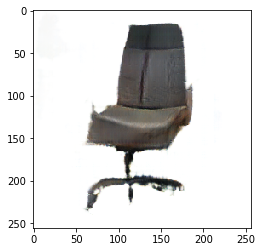

In [236]:
import matplotlib.pyplot as plt 
import matplotlib.image as mpimg
%matplotlib inline

img = mpimg.imread("output.png")

plt.imshow(img)
plt.show()